In [ ]:
#pip install "numpy<2"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import matplotlib.dates as mdates
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display, display_html, Math, Latex

import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
SEED = 322
random.seed(SEED)
np.random.seed(SEED)

In [3]:
train = pd.read_csv('train.csv')
train

,dt,price_p05,price_p95,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id
0,2024-03-28,1.136102,1.167625,-0.588881,-0.298690,-1.936029,0.621756,-0.439349,0,0,6,8,2,76,3,28,13,3,0
1,2024-03-29,1.133129,1.133590,-0.646402,0.074779,-2.090906,0.756995,-0.759561,0,0,6,8,33,77,4,29,13,3,0
2,2024-03-30,1.134522,1.165849,-0.636272,-0.644614,-1.825121,0.577839,0.122226,1,0,6,8,72,76,5,30,13,3,0
3,2024-03-31,1.152592,1.153091,-0.579004,-0.614834,-1.817634,0.589653,-0.520220,1,0,6,8,21,77,6,31,13,3,0
4,2024-04-01,1.166641,1.167096,-0.623265,-0.116090,-1.892973,0.689895,-1.036820,0,0,6,8,50,76,0,1,14,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,2024-05-22,0.919188,1.111109,-0.111936,1.566629,0.636145,1.050948,-1.497790,0,1,1,23,21,72,2,22,21,5,634
29096,2024-05-23,0.985685,1.183500,-0.159316,1.675944,0.925121,0.997947,-0.901034,0,1,1,23,70,73,3,23,21,5,634
29097,2024-05-24,0.956122,1.146569,-0.138205,1.778198,0.597174,1.140967,0.056938,0,1,1,23,12,73,4,24,21,5,634
29098,2024-05-25,1.001419,1.189856,-0.088175,2.138214,1.108497,0.991764,-1.271978,1,0,1,23,7,72,5,25,21,5,634


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29100 entries, 0 to 29099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt                   29100 non-null  datetime64[ns]
 1   price_p05            29100 non-null  float64       
 2   price_p95            29100 non-null  float64       
 3   n_stores             29100 non-null  float64       
 4   precpt               29100 non-null  float64       
 5   avg_temperature      29100 non-null  float64       
 6   avg_humidity         29100 non-null  float64       
 7   avg_wind_level       29100 non-null  float64       
 8   holiday_flag         29100 non-null  int64         
 9   activity_flag        29100 non-null  int64         
 10  management_group_id  29100 non-null  category      
 11  first_category_id    29100 non-null  category      
 12  second_category_id   29100 non-null  category      
 13  third_category_id    29100 non-null 

In [4]:
train.describe()

,price_p05,price_p95,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id
count,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000
mean,1.021477,1.116897,-0.002295,-0.186648,-0.474845,-0.050176,0.060413,0.366667,0.548866,3.756873,14.718660,36.543058,85.894983,3.100000,15.566667,17.200000,4.366667,310.117526
std,0.246938,0.238082,0.989934,0.961778,0.847154,1.018483,1.103594,0.481903,0.497615,2.331366,8.717525,21.698045,57.455431,1.989171,8.758702,2.481977,0.604622,184.343598
min,0.000000,0.000109,-0.749200,-1.139015,-2.566182,-3.333128,-2.467447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,3.000000,0.000000
25%,0.913598,1.088465,-0.582488,-0.680611,-1.168266,-0.170897,-0.756115,0.000000,0.000000,1.000000,8.000000,18.000000,33.000000,1.000000,8.000000,15.000000,4.000000,146.000000
50%,1.038869,1.142148,-0.441623,-0.480054,-0.498593,0.313721,-0.032140,0.000000,1.000000,5.000000,17.000000,36.000000,78.000000,3.000000,15.500000,17.000000,4.000000,310.000000
75%,1.143169,1.173151,0.133566,-0.167565,0.197678,0.532944,0.747768,1.000000,1.000000,6.000000,23.000000,55.000000,129.000000,5.000000,23.000000,19.000000,5.000000,469.000000
max,3.512162,3.546587,5.975207,6.458323,1.233543,1.276349,5.164815,1.000000,1.000000,6.000000,28.000000,75.000000,196.000000,6.000000,31.000000,21.000000,5.000000,634.000000


In [185]:
train.columns

Index(['dt', 'price_p05', 'price_p95', 'n_stores', 'precpt', 'avg_temperature',
       'avg_humidity', 'avg_wind_level', 'holiday_flag', 'activity_flag',
       'management_group_id', 'first_category_id', 'second_category_id',
       'third_category_id', 'dow', 'day_of_month', 'week_of_year', 'month',
       'product_id'],
      dtype='object')

#### Целевая переменная:  
 - price_p05 — нижняя граница диапазона цены (примерно 5-й квантиль по магазинам)
 - price_p95 — верхняя граница диапазона цены (примерно 95-й квантиль по магазинам)

#### Признаки:  
##### Идентификаторы и иерархия товаров:  
1.product_id — идентификатор товара  
2-5. management_group_id, first_category_id, second_category_id, third_category_id — иерархические категориальные признаки, описывающие принадлежность товара к группам и категориям ассортимента 

##### Календарные признаки:
6.dt — дата  
7.dow — день недели  
8.day_of_month — номер дня в месяце  
9.week_of_year — номер недели  
10.month — месяц  

##### Контекстные признаки спроса и среды:  
11.n_stores — количество магазинов, в которых товар наблюдался в этот день  
12.holiday_flag — индикатор праздничного дня  
13.activity_flag — индикатор маркетинговой активности / акции   
14-17.precpt, avg_temperature, avg_humidity, avg_wind_level — агрегированные погодные характеристики для региона  

In [4]:
train["dt"] = pd.to_datetime(train["dt"]) #datatime

In [5]:
train = train.sort_values('dt')

### Графички

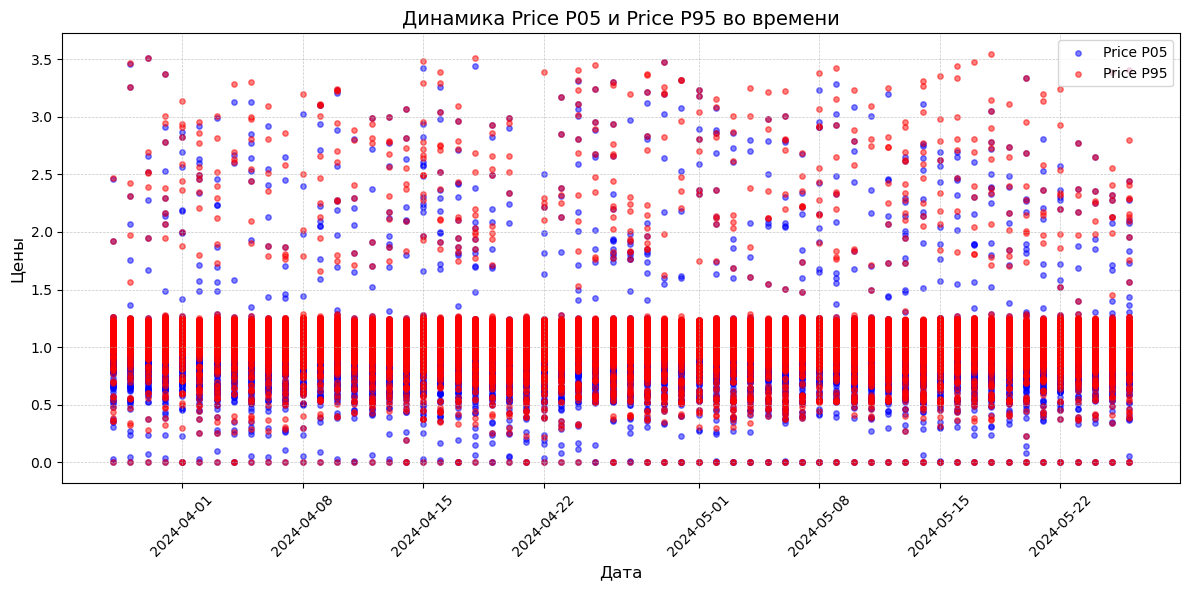

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(train.dt, train.price_p05, alpha=0.5, color='blue', s=15, label='Price P05')
ax.scatter(train.dt, train.price_p95, alpha=0.5, color='red', s=15, label='Price P95')

ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Цены', fontsize=12)
ax.set_title('Динамика Price P05 и Price P95 во времени', fontsize=14)
ax.legend()

# Настройка формата дат
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.tick_params(axis='x', rotation=45)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

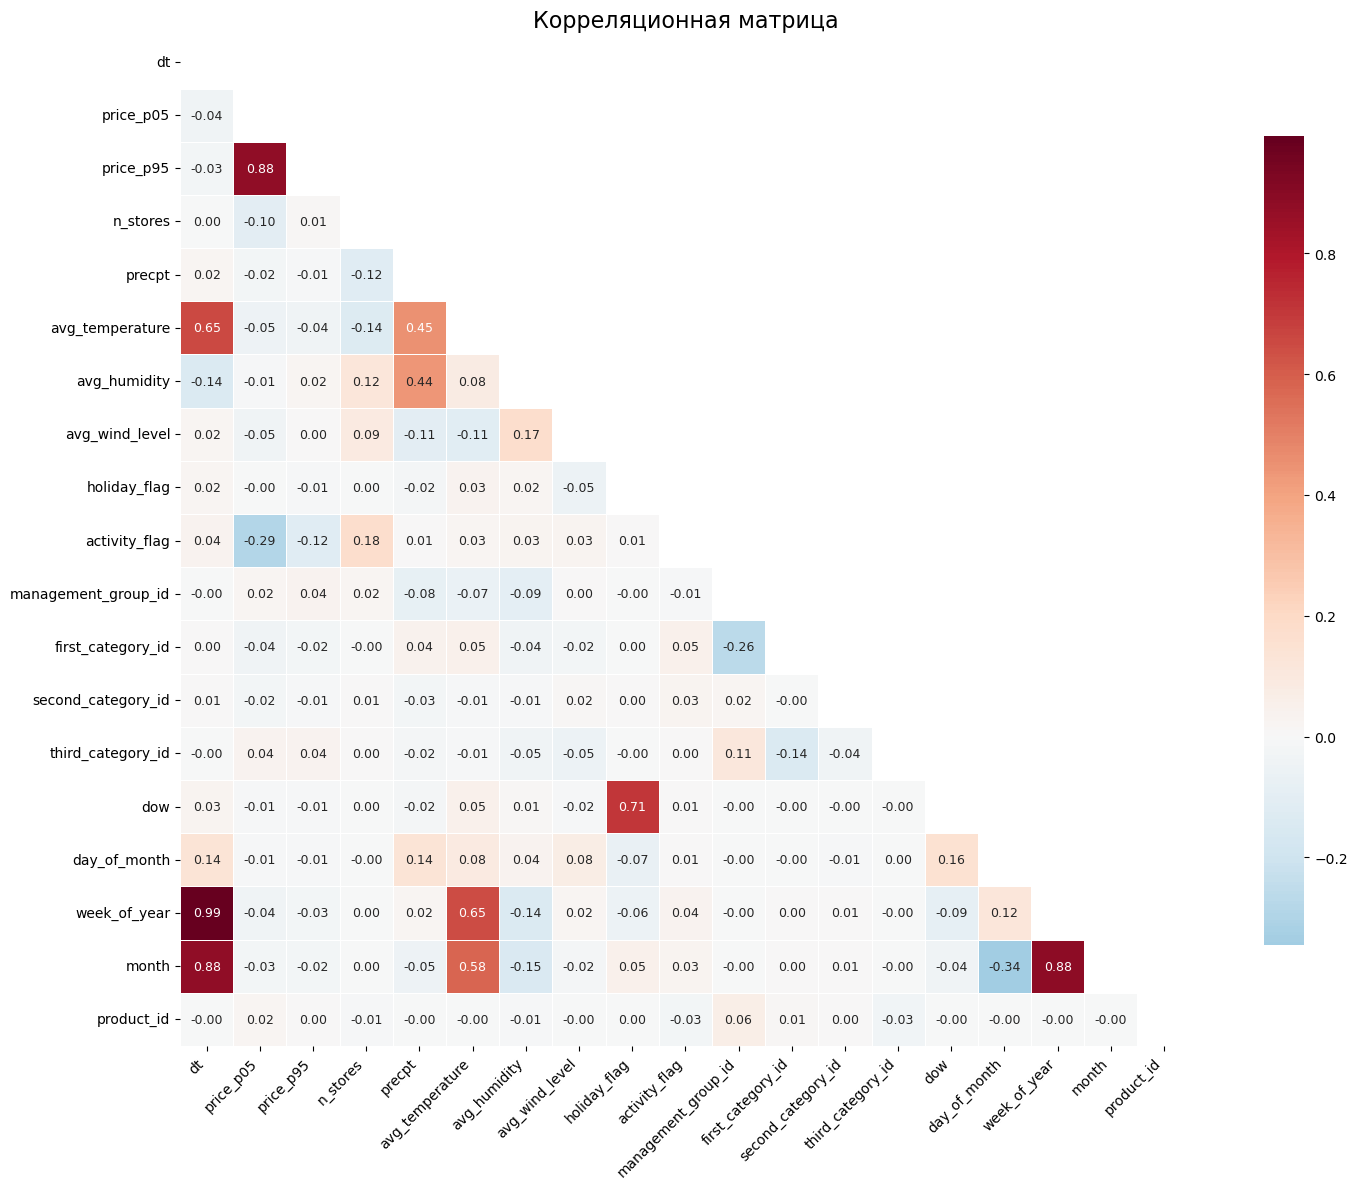

In [8]:
corr_matrix = train.corr()

mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            mask=mask_upper,  
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 9})

plt.title('Корреляционная матрица', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### => Большинство признаков практически не коррелируют с целевыми переменными или влияние нелинейное

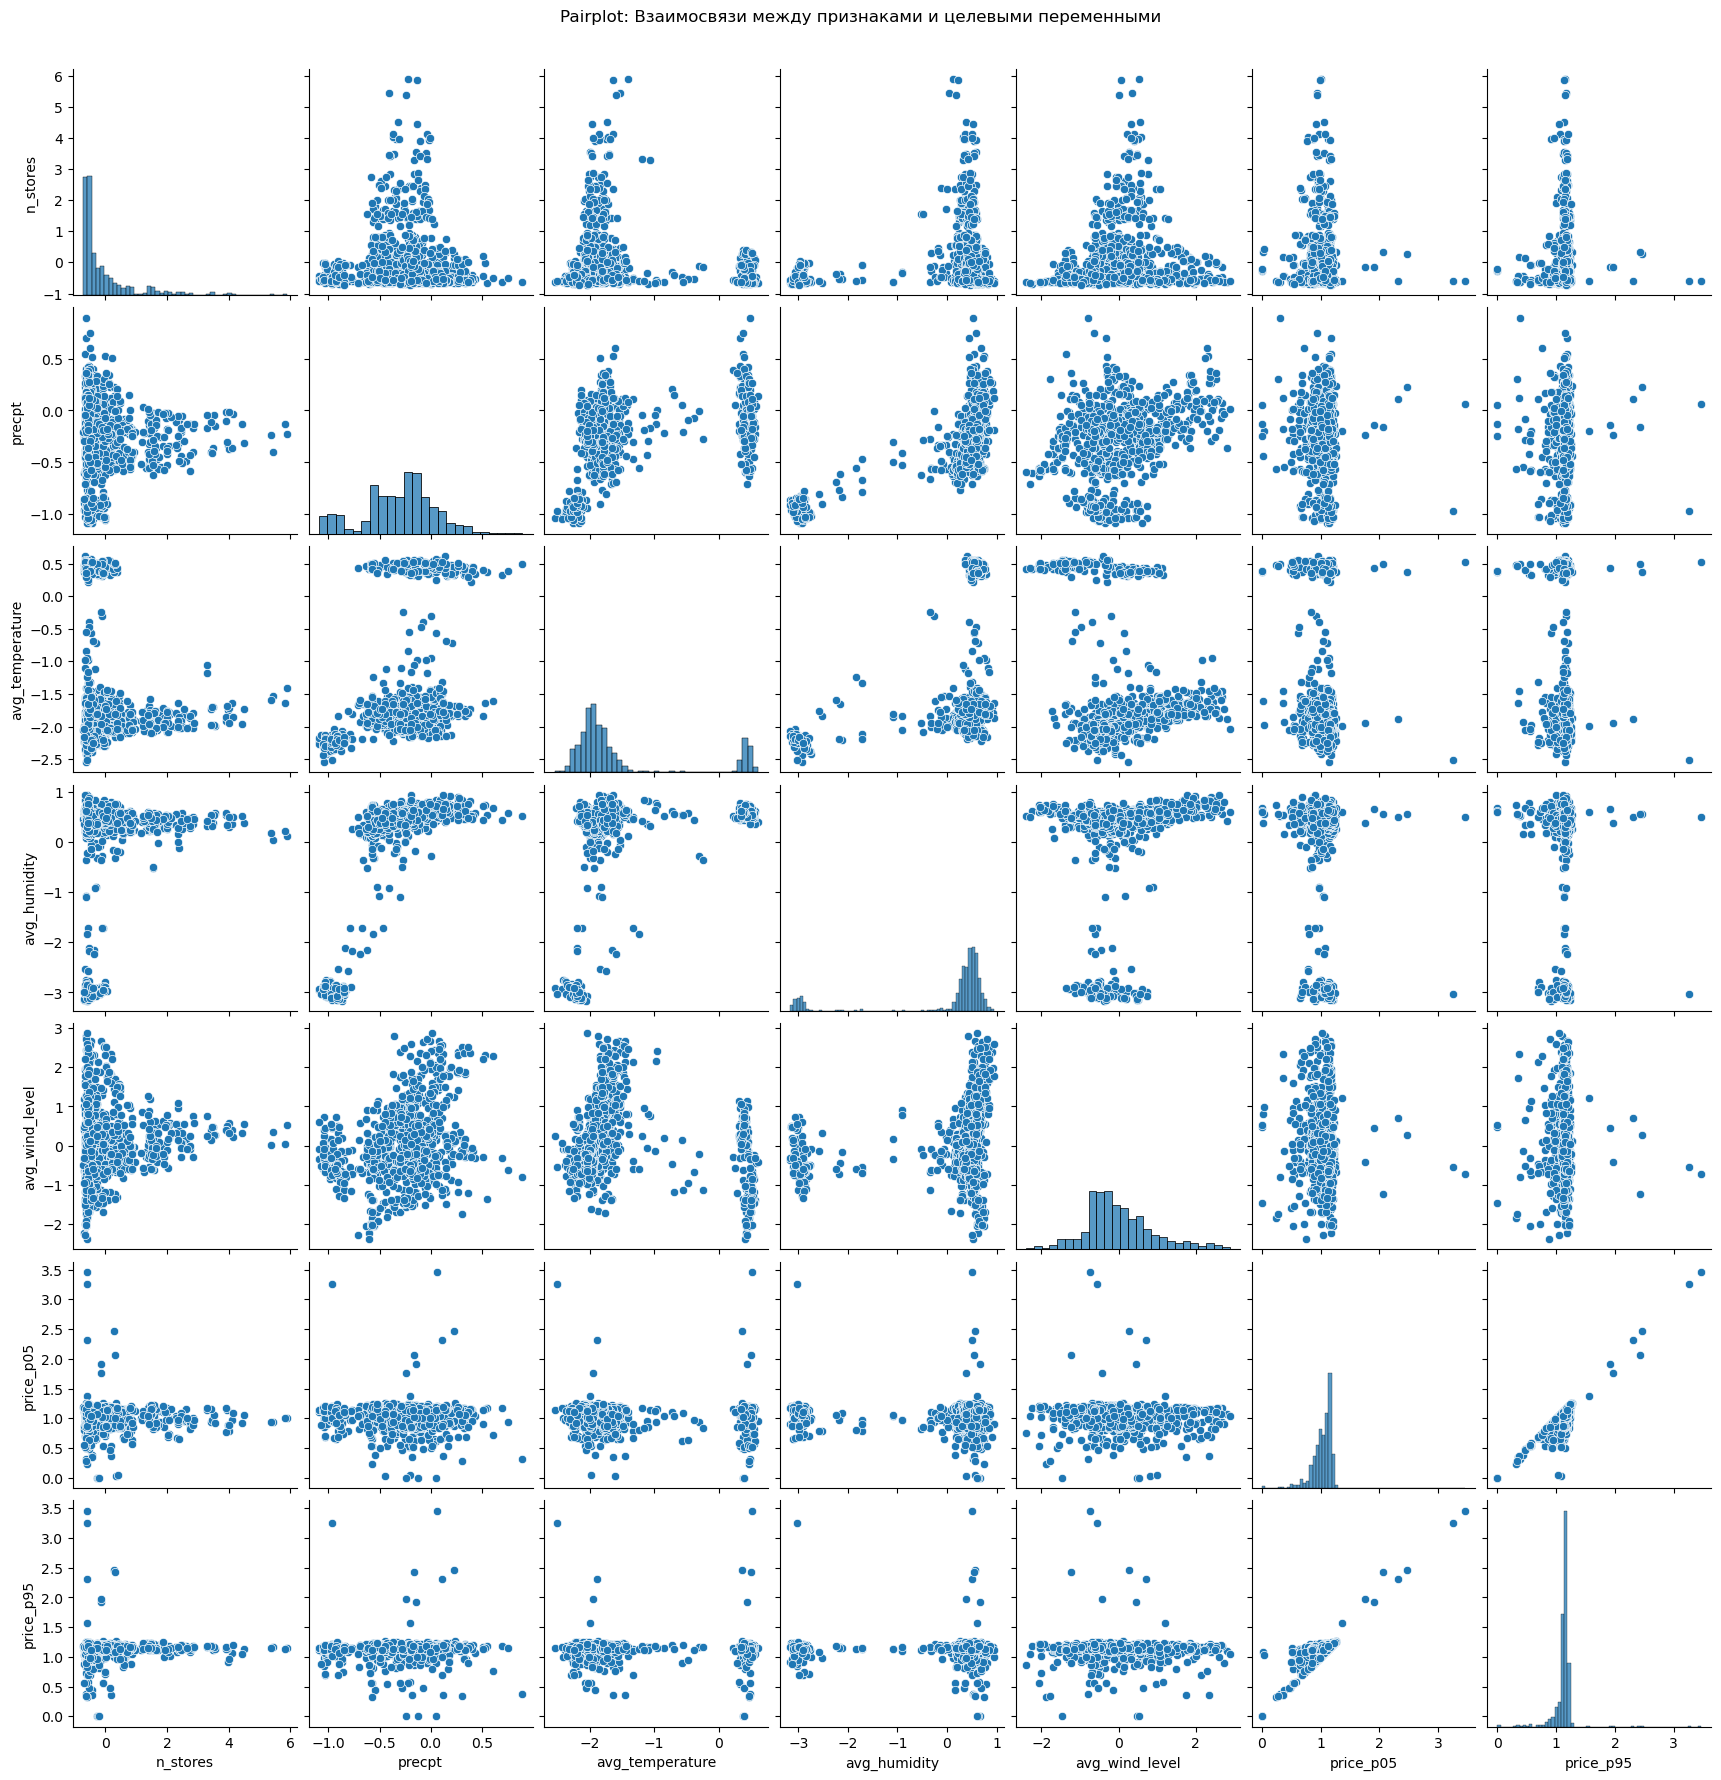

In [9]:
sample_data = train[:1000] 

# Создаем pairplot с целевыми переменными
selected_features = [
    'n_stores', 'precpt', 'avg_temperature', 'avg_humidity', 
    'avg_wind_level', 'price_p05', 'price_p95'
]

sns.pairplot(sample_data[selected_features])
plt.suptitle('Pairplot: Взаимосвязи между признаками и целевыми переменными', y=1.02)
plt.show()

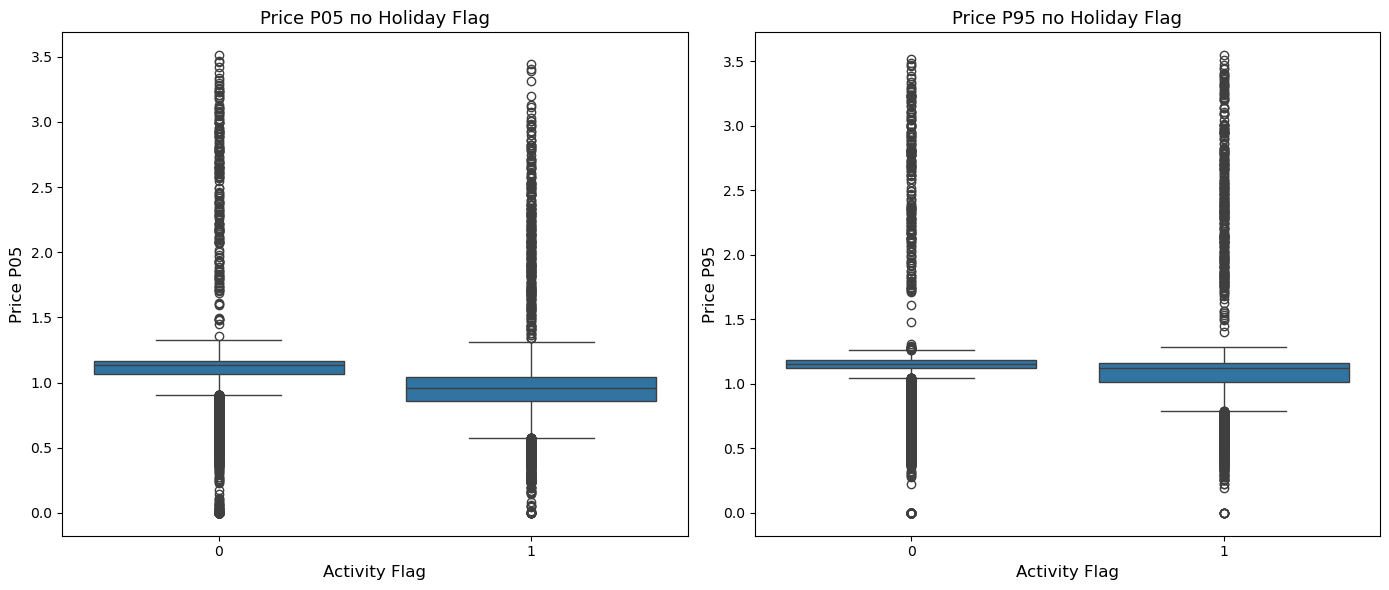

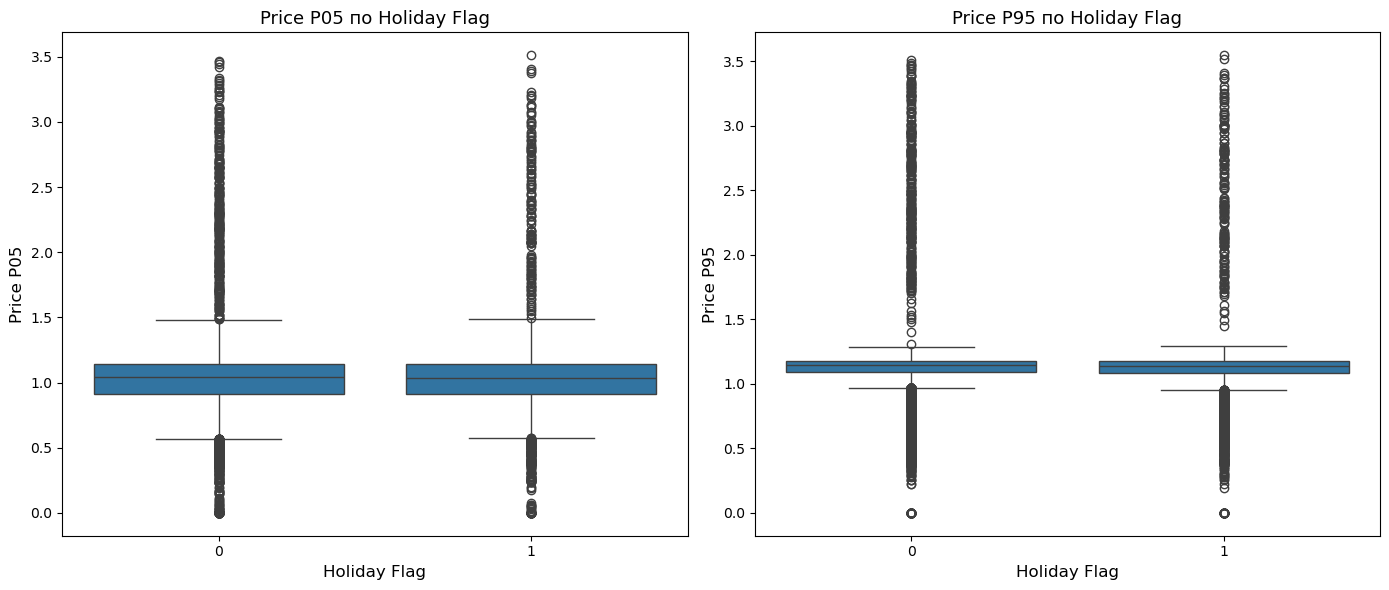

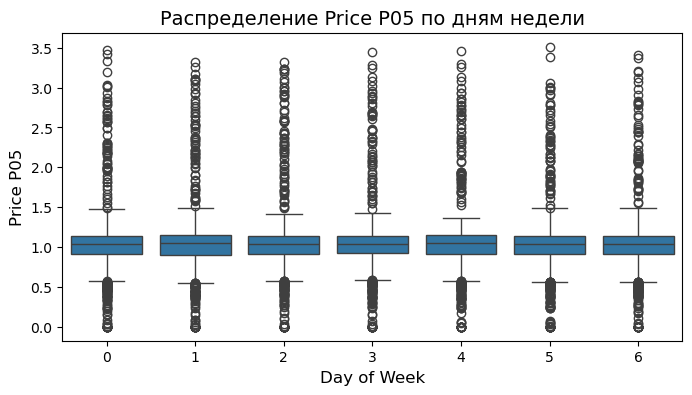

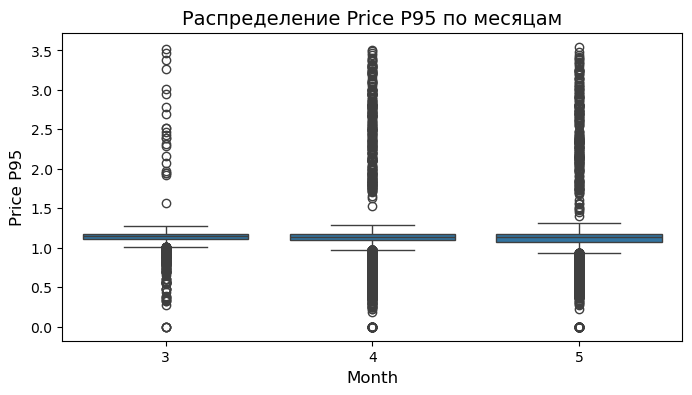

In [10]:
# 1. Анализ по activity_flag 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='activity_flag', y='price_p05', data=train, ax=axes[0])
axes[0].set_ylabel('Price P05', fontsize=12)
axes[0].set_xlabel('Activity Flag', fontsize=12)
axes[0].set_title('Price P05 по Holiday Flag', fontsize=13)

sns.boxplot(x='activity_flag', y='price_p95', data=train, ax=axes[1])
axes[1].set_ylabel('Price P95', fontsize=12)
axes[1].set_xlabel('Activity Flag', fontsize=12)
axes[1].set_title('Price P95 по Holiday Flag', fontsize=13)

plt.tight_layout()
plt.show()

# 2. Анализ по holiday_flag
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='holiday_flag', y='price_p05', data=train, ax=axes[0])
axes[0].set_ylabel('Price P05', fontsize=12)
axes[0].set_xlabel('Holiday Flag', fontsize=12)
axes[0].set_title('Price P05 по Holiday Flag', fontsize=13)

sns.boxplot(x='holiday_flag', y='price_p95', data=train, ax=axes[1])
axes[1].set_ylabel('Price P95', fontsize=12)
axes[1].set_xlabel('Holiday Flag', fontsize=12)
axes[1].set_title('Price P95 по Holiday Flag', fontsize=13)

plt.tight_layout()
plt.show()

# 3. Анализ по дням недели (dow)
plt.figure(figsize=(8, 4))
sns.boxplot(x='dow', y='price_p05', data=train)
plt.ylabel('Price P05', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Распределение Price P05 по дням недели', fontsize=14)
plt.xticks(rotation=0)
plt.show()

# 4. Анализ по месяцам
plt.figure(figsize=(8, 4))
sns.boxplot(x='month', y='price_p95', data=train)
plt.ylabel('Price P95', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Распределение Price P95 по месяцам', fontsize=14)
plt.xticks(rotation=0)
plt.show()

### Функция расчета метрики

In [6]:
def mean_iou_1d(
    y05_true,
    y95_true,
    y05_pred,
    y95_pred,
    eps=1e-6
):
    """
    Mean 1D Intersection over Union for price intervals
    """

    # утолщение интервалов
    lower_true = y05_true - eps
    upper_true = y95_true + eps

    lower_pred = y05_pred - eps
    upper_pred = y95_pred + eps

    # intersection
    intersection = np.maximum(
        0.0,
        np.minimum(upper_true, upper_pred)
        - np.maximum(lower_true, lower_pred)
    )

    # widths
    width_true = upper_true - lower_true
    width_pred = upper_pred - lower_pred

    # union
    union = width_true + width_pred - intersection

    iou = intersection / union
    return np.mean(iou)

### Сплит на трейн и валидацию

In [7]:
NUM_FEATURES = [
    "dow", "day_of_month", "week_of_year", "month",
    "n_stores", "holiday_flag", "activity_flag",
    "precpt", "avg_temperature", "avg_humidity", "avg_wind_level"
    #'sin_day_of_year', 'cos_day_of_year', 'sin_month', 'cos_month'
    
    # 'p05_lag_1', 'p95_lag_1', 'p05_lag_2', 'p95_lag_2',
    #    'p05_lag_3', 'p95_lag_3', 'p05_lag_7', 'p95_lag_7',
    #    'rolling_mean_p95_7', 'rolling_std_p95_7', 'holiday_soon' 
]

CAT_FEATURES = [
    "product_id", "management_group_id", "first_category_id",
    "second_category_id", "third_category_id"
   # 'year', 'quarter', 'day_of_year', 'is_weekend', 'days_since_start'
    #'cluster'
]

FEATURES = NUM_FEATURES + CAT_FEATURES

In [8]:
# приведение категорий
for col in CAT_FEATURES:
    train[col] = train[col].astype("category")

X = train[FEATURES]
y_p05 = train["price_p05"]
y_p95 = train["price_p95"]

In [9]:
split_date = train["dt"].quantile(0.8)

train_idx = train["dt"] <= split_date
val_idx = train["dt"] > split_date

X_train, X_val = X[train_idx], X[val_idx]
y05_train, y05_val = y_p05[train_idx], y_p05[val_idx]
y95_train, y95_val = y_p95[train_idx], y_p95[val_idx]

## Квантильная регрессия (2 модели: для price05 и price95)

### LightGBM

#### подбор параметров для р05

In [14]:
def train_lgb_p05(
    params,
    X_train, y05_train,
    X_val, y05_val,
    y95_val,        # нужен для IoU
    y95_val_pred,   # фиксированный p95
    n_estimators=1000
):
    model = lgb.LGBMRegressor(
        objective="quantile",
        alpha=0.05,
        n_estimators=n_estimators,
        random_state=322,
        **params
    )

    model.fit(
        X_train, y05_train,
        eval_set=[(X_val, y05_val)],
        eval_metric="quantile"
    )

    y05_val_pred = model.predict(X_val)

    # защита от инверсии
    lower = np.minimum(y05_val_pred, y95_val_pred)
    upper = np.maximum(y05_val_pred, y95_val_pred)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        lower,
        upper
    )

    return model, iou

learning_rate=0.3: IoU=0.22250
learning_rate=0.2: IoU=0.22430
learning_rate=0.15: IoU=0.22480
learning_rate=0.1: IoU=0.22365
learning_rate=0.05: IoU=0.22255


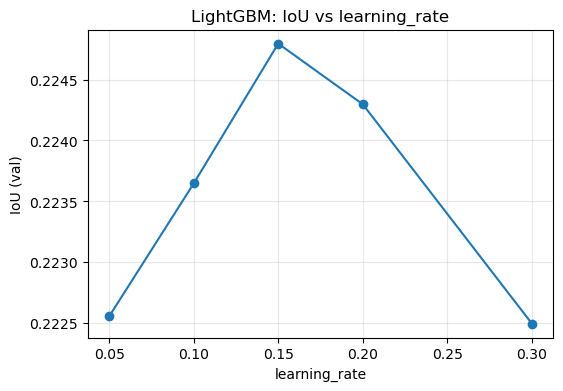

In [15]:
learning_rates = [0.3, 0.2, 0.15, 0.1, 0.05]
ious = []

for lr in learning_rates:
    params = {
        "learning_rate": lr,
        "num_leaves": 63,
        "min_data_in_leaf": 50,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "bagging_freq": 1,
        "verbosity": -1,
    }

    _, iou = train_lgb_p05(
        params,
        X_train, y05_train,
        X_val, y05_val,
        y95_val,
        y95_val_pred
    )

    ious.append(iou)
    print(f"learning_rate={lr}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(learning_rates, ious, marker="o")
plt.xlabel("learning_rate")
plt.ylabel("IoU (val)")
plt.title("LightGBM: IoU vs learning_rate")
plt.grid(alpha=0.3)
plt.show()

num_leaves=170: IoU=0.19921
num_leaves=190: IoU=0.19945
num_leaves=210: IoU=0.19919


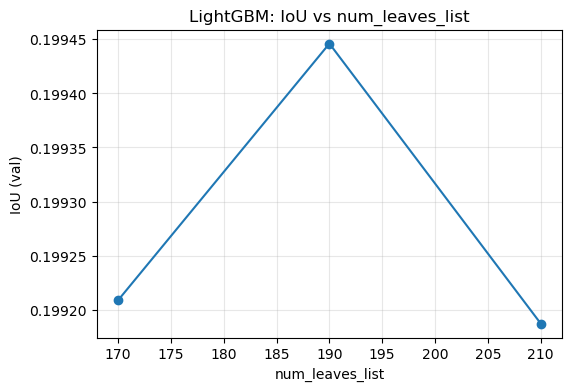

In [40]:
num_leaves_list = [170, 190, 210]
ious = []

for nl in num_leaves_list:
    params = {
        "learning_rate": 0.15,
        "num_leaves": nl,
        "min_data_in_leaf": 50,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "verbosity": -1,
    }

    _, iou = train_lgb_p05(
        params,
        X_train, y05_train,
        X_val, y05_val,
        y95_val,
        y95_val_pred
    )

    ious.append(iou)
    print(f"num_leaves={nl}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(num_leaves_list, ious, marker="o")
plt.xlabel("num_leaves_list")
plt.ylabel("IoU (val)")
plt.title("LightGBM: IoU vs num_leaves_list")
plt.grid(alpha=0.3)
plt.show()

min_data_in_leaf=2: IoU=0.19811
min_data_in_leaf=5: IoU=0.20109
min_data_in_leaf=10: IoU=0.20083
min_data_in_leaf=20: IoU=0.19969
min_data_in_leaf=50: IoU=0.19945


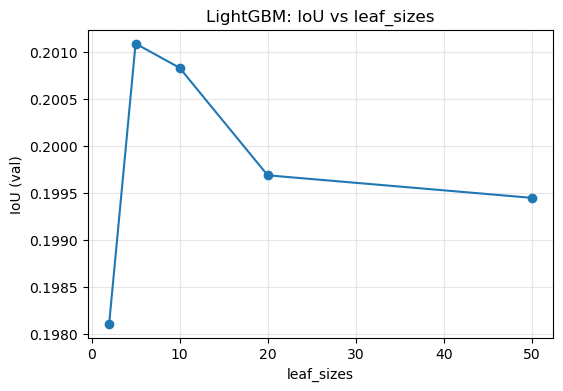

In [44]:
leaf_sizes = [2, 5, 10, 20, 50]
ious = []

for leaf in leaf_sizes:
    params = {
        "learning_rate": 0.15,
        "num_leaves": 190,
        "min_data_in_leaf": leaf,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "verbosity": -1,
    }

    _, iou = train_lgb_p05(
        params,
        X_train, y05_train,
        X_val, y05_val,
        y95_val,
        y95_val_pred
    )

    ious.append(iou)
    print(f"min_data_in_leaf={leaf}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(leaf_sizes, ious, marker="o")
plt.xlabel("leaf_sizes")
plt.ylabel("IoU (val)")
plt.title("LightGBM: IoU vs leaf_sizes")
plt.grid(alpha=0.3)
plt.show()

#### подбор параметров для р95

In [45]:
def train_lgb_p95(
    params,
    X_train, y95_train,
    X_val, y95_val,
    y05_val,        
    y05_val_pred,   
    n_estimators=1000
):
    model = lgb.LGBMRegressor(
        objective="quantile",
        alpha=0.05,
        n_estimators=n_estimators,
        random_state=322,
        **params
    )

    model.fit(
        X_train, y95_train,
        eval_set=[(X_val, y95_val)],
        eval_metric="quantile"
    )

    y05_val_pred = model.predict(X_val)

    # защита от инверсии
    lower = np.minimum(y05_val_pred, y95_val_pred)
    upper = np.maximum(y05_val_pred, y95_val_pred)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        lower,
        upper
    )

    return model, iou

learning_rate=0.01: IoU=0.15490
learning_rate=0.005: IoU=0.16513
learning_rate=0.001: IoU=0.18916
learning_rate=0.0005: IoU=0.18835


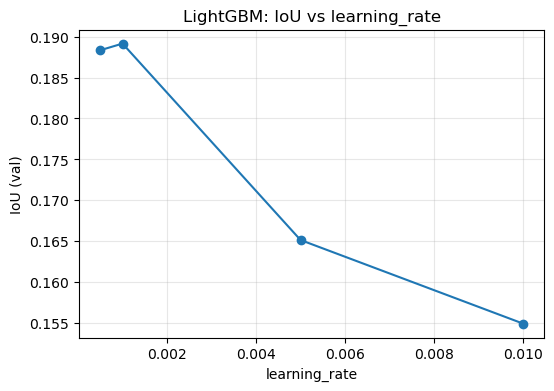

In [50]:
learning_rates = [0.01, 0.005, 0.001, 0.0005]
ious = []

for lr in learning_rates:
    params = {
        "learning_rate": lr,
        "num_leaves": 63,
        "min_data_in_leaf": 50,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "bagging_freq": 1,
        "verbosity": -1,
    }

    _, iou = train_lgb_p95(
        params,
        X_train, y95_train,
        X_val, y95_val,
        y05_val,
        y05_val_pred
    )

    ious.append(iou)
    print(f"learning_rate={lr}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(learning_rates, ious, marker="o")
plt.xlabel("learning_rate")
plt.ylabel("IoU (val)")
plt.title("LightGBM: IoU vs learning_rate")
plt.grid(alpha=0.3)
plt.show()

num_leaves=5: IoU=0.19201
num_leaves=10: IoU=0.19308
num_leaves=20: IoU=0.19083
num_leaves=30: IoU=0.18946


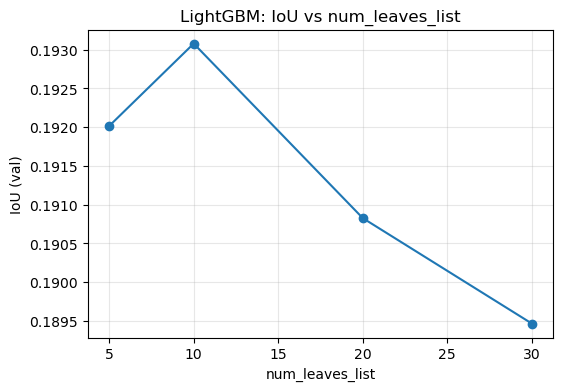

In [54]:
num_leaves_list = [5, 10, 20, 30]
ious = []

for nl in num_leaves_list:
    params = {
        "learning_rate": 0.001,
        "num_leaves": nl,
        "min_data_in_leaf": 50,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "verbosity": -1,
    }

    _, iou = train_lgb_p95(
        params,
        X_train, y95_train,
        X_val, y95_val,
        y05_val,
        y05_val_pred
    )

    ious.append(iou)
    print(f"num_leaves={nl}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(num_leaves_list, ious, marker="o")
plt.xlabel("num_leaves_list")
plt.ylabel("IoU (val)")
plt.title("LightGBM: IoU vs num_leaves_list")
plt.grid(alpha=0.3)
plt.show()

min_data_in_leaf=2: IoU=0.19305
min_data_in_leaf=5: IoU=0.19305
min_data_in_leaf=10: IoU=0.19309
min_data_in_leaf=20: IoU=0.19306
min_data_in_leaf=50: IoU=0.19308


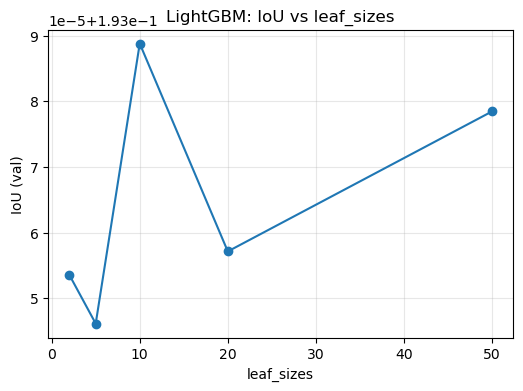

In [55]:
leaf_sizes = [2, 5, 10, 20, 50]
ious = []

for leaf in leaf_sizes:
    params = {
        "learning_rate": 0.001,
        "num_leaves": 10,
        "min_data_in_leaf": leaf,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "verbosity": -1,
    }

    _, iou = train_lgb_p95(
        params,
        X_train, y95_train,
        X_val, y95_val,
        y05_val,
        y05_val_pred
    )

    ious.append(iou)
    print(f"min_data_in_leaf={leaf}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(leaf_sizes, ious, marker="o")
plt.xlabel("leaf_sizes")
plt.ylabel("IoU (val)")
plt.title("LightGBM: IoU vs leaf_sizes")
plt.grid(alpha=0.3)
plt.show()

#### Итоговые параметры

In [32]:
lgb_params = {
    "objective": "quantile",
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "verbosity": -1,

    # SEEDS
    "seed": SEED,
    "feature_fraction_seed": SEED,
    "bagging_seed": SEED,
    "data_random_seed": SEED,
}

# Модель для 5 квантиля цены
params_p05 = lgb_params.copy()

params_p05["alpha"] = 0.05
params_p05["learning_rate"] = 0.15
params_p05["num_leaves"] = 190
params_p05["min_data_in_leaf"] = 5

model_lgb_p05 = lgb.LGBMRegressor(**params_p05, n_estimators=200, random_state=SEED)

model_lgb_p05.fit(
    X_train, y05_train,
    #eval_set=[(X_val, y05_val)],
    eval_metric="quantile",
    categorical_feature=CAT_FEATURES
   # early_stopping_rounds=50,
   # verbose=False
)

# Модель для 95 квантиля цены
params_p95 = lgb_params.copy()
params_p95["alpha"] = 0.95
params_p95["learning_rate"] = 0.001
params_p95["num_leaves"] = 10
params_p95["min_data_in_leaf"] = 10

model_lgb_p95 = lgb.LGBMRegressor(**params_p95, n_estimators=200, random_state=SEED)

model_lgb_p95.fit(
    X_train, y95_train,
    #eval_set=[(X_val, y95_val)],
    eval_metric="quantile",
    categorical_feature=CAT_FEATURES
   # early_stopping_rounds=50,
   # verbose=False
)

,boosting_type,'gbdt'
,num_leaves,10
,max_depth,-1
,learning_rate,0.001
,n_estimators,200
,subsample_for_bin,200000
,objective,'quantile'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


#### Метрика на валидации

In [33]:
y05_val_pred = model_lgb_p05.predict(X_val)
y95_val_pred = model_lgb_p95.predict(X_val)

val_iou = mean_iou_1d(
    y05_true=y05_val.values,
    y95_true=y95_val.values,
    y05_pred=y05_val_pred,
    y95_pred=y95_val_pred
)

print(f"Validation IoU: {val_iou:.5f}")

lower = np.minimum(y05_val_pred, y95_val_pred)
upper = np.maximum(y05_val_pred, y95_val_pred)

y05_val_pred = lower
y95_val_pred = upper

Validation IoU: 0.22915


#### Метрика после калибровки

In [34]:
def calibrate_width(y05, y95, alpha):
    center = (y05 + y95) / 2
    width = (y95 - y05) * alpha
    return center - width / 2, center + width / 2

alphas = np.linspace(0.001, 5, 9)

best_alpha = None
best_iou_lgb = -1

for a in alphas:
    p05_adj, p95_adj = calibrate_width(y05_val_pred, y95_val_pred, a)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        p05_adj,
        p95_adj
    )

    if iou > best_iou_lgb:
        best_iou_lgb = iou
        best_alpha = a

print(f"Best alpha: {best_alpha}, IoU: {best_iou_lgb:.5f}")

Best alpha: 0.625875, IoU: 0.26542


### XGBoost

In [35]:
#Закодирумые категории в числа
encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

X_train_enc = X_train.copy()
X_val_enc = X_val.copy()

X_train_enc[CAT_FEATURES] = encoder.fit_transform(X_train[CAT_FEATURES])
X_val_enc[CAT_FEATURES] = encoder.transform(X_val[CAT_FEATURES])

#### подбор параметров для р05

In [157]:
def train_xgb_p05(
    params,
    X_train_enc, y05_train,
    X_val_enc, y05_val,
    y95_val,
    y95_val_pred,
    n_estimators=800
):
    model = XGBRegressor(
        objective="reg:squarederror",
        n_estimators=n_estimators,
        random_state=322,
        tree_method="hist",
        **params
    )

    model.fit(
        X_train_enc, y05_train,
        eval_set=[(X_val_enc, y05_val)],
        verbose=False
    )

    y05_val_pred = model.predict(X_val_enc)

    # защита от инверсии
    lower = np.minimum(y05_val_pred, y95_val_pred)
    upper = np.maximum(y05_val_pred, y95_val_pred)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        lower,
        upper
    )

    return model, iou

learning_rate=0.02: IoU=0.21494
learning_rate=0.01: IoU=0.21716
learning_rate=0.005: IoU=0.21730
learning_rate=0.001: IoU=0.20726


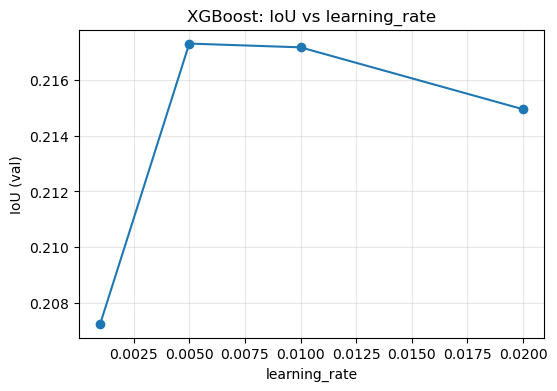

In [158]:
learning_rates = [0.02, 0.01, 0.005, 0.001]
ious = []

for lr in learning_rates:
    params = {
        "learning_rate": lr,
        "max_depth": 6,
        "min_child_weight": 10,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "reg_lambda": 1.0,
    }

    _, iou = train_xgb_p05(
        params,
        X_train_enc, y05_train,
        X_val_enc, y05_val,
        y95_val,
        y95_val_pred
    )

    ious.append(iou)
    print(f"learning_rate={lr}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(learning_rates, ious, marker="o")
plt.xlabel("learning_rate")
plt.ylabel("IoU (val)")
plt.title("XGBoost: IoU vs learning_rate")
plt.grid(alpha=0.3)
plt.show()

max_depth=3: IoU=0.21183
max_depth=4: IoU=0.21454
max_depth=5: IoU=0.21618
max_depth=6: IoU=0.21730
max_depth=7: IoU=0.21690
max_depth=8: IoU=0.21653


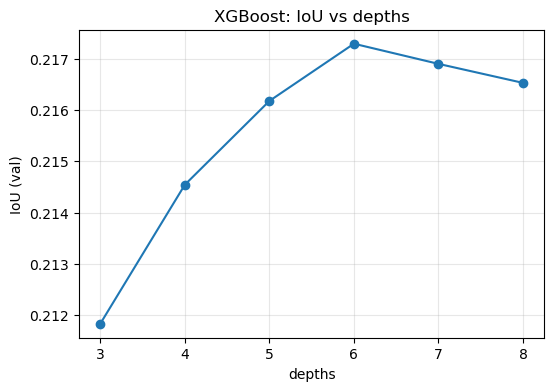

In [159]:
depths = [3, 4, 5, 6, 7, 8]
ious = []

for d in depths:
    params = {
        "learning_rate": 0.005,
        "max_depth": d,
        "min_child_weight": 10,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
    }

    _, iou = train_xgb_p05(
        params,
        X_train_enc, y05_train,
        X_val_enc, y05_val,
        y95_val,
        y95_val_pred
    )

    ious.append(iou)
    print(f"max_depth={d}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(depths, ious, marker="o")
plt.xlabel("depths")
plt.ylabel("IoU (val)")
plt.title("XGBoost: IoU vs depths")
plt.grid(alpha=0.3)
plt.show()

min_child_weight=1: IoU=0.21588
min_child_weight=5: IoU=0.21633
min_child_weight=10: IoU=0.21730
min_child_weight=20: IoU=0.21777
min_child_weight=50: IoU=0.21883
min_child_weight=70: IoU=0.21907
min_child_weight=90: IoU=0.21876


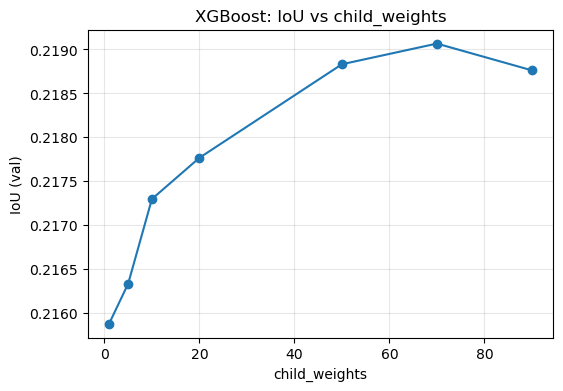

In [161]:
child_weights = [1, 5, 10, 20, 50, 70, 90]
ious = []

for cw in child_weights:
    params = {
        "learning_rate": 0.005,
        "max_depth": 6,
        "min_child_weight": cw,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
    }

    _, iou = train_xgb_p05(
        params,
        X_train_enc, y05_train,
        X_val_enc, y05_val,
        y95_val,
        y95_val_pred
    )

    ious.append(iou)
    print(f"min_child_weight={cw}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(child_weights, ious, marker="o")
plt.xlabel("child_weights")
plt.ylabel("IoU (val)")
plt.title("XGBoost: IoU vs child_weights")
plt.grid(alpha=0.3)
plt.show()

reg_lambda=1: IoU=0.21907
reg_lambda=5: IoU=0.21906
reg_lambda=10: IoU=0.21908
reg_lambda=15: IoU=0.21904
reg_lambda=20: IoU=0.21904
reg_lambda=25: IoU=0.21889
reg_lambda=30: IoU=0.21892


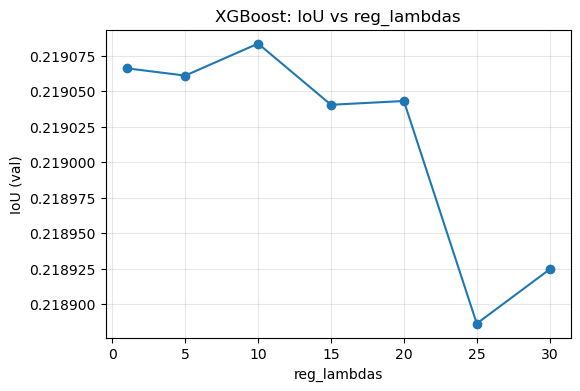

In [164]:
reg_lambdas = [1, 5, 10, 15, 20, 25, 30]
ious = []

for reg in reg_lambdas:
    params = {
        "learning_rate": 0.005,
        "max_depth": 6,
        "min_child_weight": 70,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "reg_lambda": reg,
    }

    _, iou = train_xgb_p05(
        params,
        X_train_enc, y05_train,
        X_val_enc, y05_val,
        y95_val,
        y95_val_pred
    )

    ious.append(iou)
    print(f"reg_lambda={reg}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(reg_lambdas, ious, marker="o")
plt.xlabel("reg_lambdas")
plt.ylabel("IoU (val)")
plt.title("XGBoost: IoU vs reg_lambdas")
plt.grid(alpha=0.3)
plt.show()

#### подбор параметров для р95

In [165]:
def train_xgb_p95(
    params,
    X_train_enc, y95_train,
    X_val_enc, y95_val,
    y05_val,
    y05_val_pred,
    n_estimators=800
):
    model = XGBRegressor(
        objective="reg:squarederror",
        n_estimators=n_estimators,
        random_state=322,
        tree_method="hist",
        **params
    )

    model.fit(
        X_train_enc, y95_train,
        eval_set=[(X_val_enc, y95_val)],
        verbose=False
    )

    y95_val_pred = model.predict(X_val_enc)

    # защита от инверсии
    lower = np.minimum(y05_val_pred, y95_val_pred)
    upper = np.maximum(y05_val_pred, y95_val_pred)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        lower,
        upper
    )

    return model, iou

learning_rate=0.005: IoU=0.24261
learning_rate=0.001: IoU=0.24622
learning_rate=0.0005: IoU=0.24541
learning_rate=0.0001: IoU=0.24372


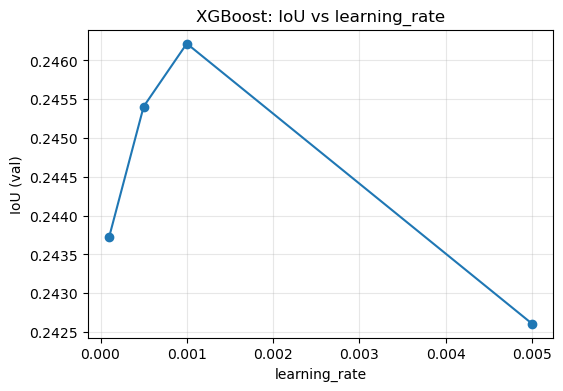

In [166]:
learning_rates = [0.005, 0.001, 0.0005, 0.0001]
ious = []

for lr in learning_rates:
    params = {
        "learning_rate": lr,
        "max_depth": 6,
        "min_child_weight": 10,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "reg_lambda": 1.0,
    }

    _, iou = train_xgb_p95(
        params,
        X_train_enc, y95_train,
        X_val_enc, y95_val,
        y05_val,
        y05_val_pred
    )

    ious.append(iou)
    print(f"learning_rate={lr}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(learning_rates, ious, marker="o")
plt.xlabel("learning_rate")
plt.ylabel("IoU (val)")
plt.title("XGBoost: IoU vs learning_rate")
plt.grid(alpha=0.3)
plt.show()

max_depth=8: IoU=0.24817
max_depth=10: IoU=0.24952
max_depth=13: IoU=0.25071
max_depth=15: IoU=0.25094
max_depth=20: IoU=0.25133
max_depth=25: IoU=0.25144
max_depth=35: IoU=0.25141


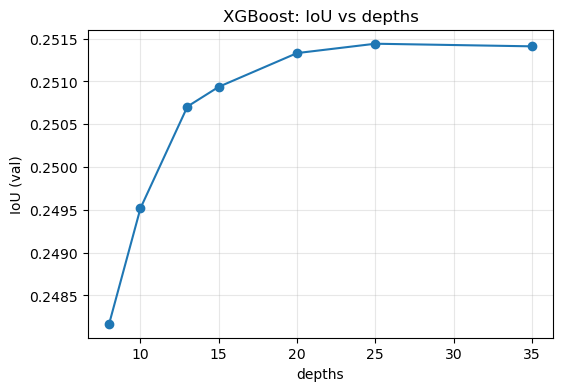

In [169]:
depths = [8, 10, 13, 15, 20, 25, 35]
ious = []

for d in depths:
    params = {
        "learning_rate": 0.001,
        "max_depth": d,
        "min_child_weight": 10,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
    }

    _, iou = train_xgb_p95(
        params,
        X_train_enc, y95_train,
        X_val_enc, y95_val,
        y05_val,
        y05_val_pred
    )

    ious.append(iou)
    print(f"max_depth={d}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(depths, ious, marker="o")
plt.xlabel("depths")
plt.ylabel("IoU (val)")
plt.title("XGBoost: IoU vs depths")
plt.grid(alpha=0.3)
plt.show()

min_child_weight=0.5: IoU=0.25040
min_child_weight=1: IoU=0.25040
min_child_weight=5: IoU=0.25123
min_child_weight=10: IoU=0.25144
min_child_weight=20: IoU=0.25078


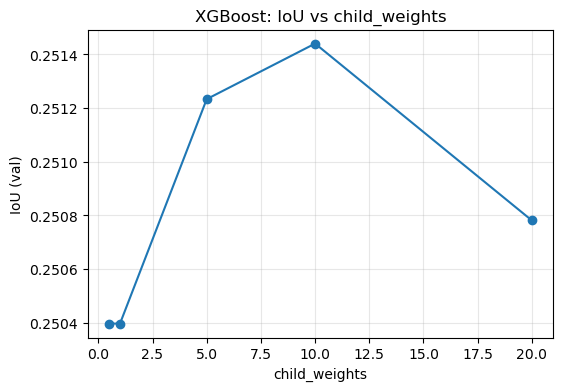

In [170]:
child_weights = [0.5, 1, 5, 10, 20]
ious = []

for cw in child_weights:
    params = {
        "learning_rate": 0.001,
        "max_depth": 25,
        "min_child_weight": cw,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
    }

    _, iou = train_xgb_p95(
        params,
        X_train_enc, y95_train,
        X_val_enc, y95_val,
        y05_val,
        y05_val_pred
    )

    ious.append(iou)
    print(f"min_child_weight={cw}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(child_weights, ious, marker="o")
plt.xlabel("child_weights")
plt.ylabel("IoU (val)")
plt.title("XGBoost: IoU vs child_weights")
plt.grid(alpha=0.3)
plt.show()

reg_lambda=0.1: IoU=0.25138
reg_lambda=0.5: IoU=0.25149
reg_lambda=1: IoU=0.25144
reg_lambda=2: IoU=0.25149
reg_lambda=5: IoU=0.25117
reg_lambda=10: IoU=0.25035


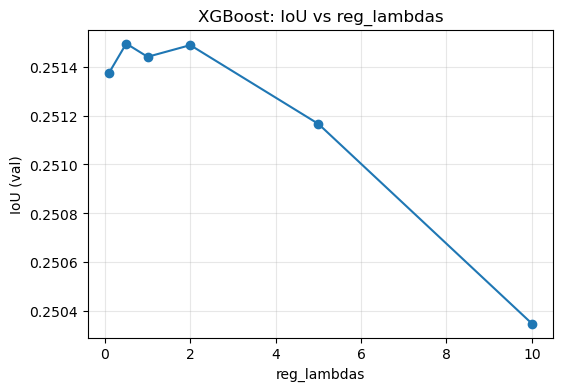

In [171]:
reg_lambdas = [0.1, 0.5, 1, 2, 5, 10]
ious = []

for reg in reg_lambdas:
    params = {
        "learning_rate": 0.001,
        "max_depth": 25,
        "min_child_weight": 10,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "reg_lambda": reg,
    }

    _, iou = train_xgb_p95(
        params,
        X_train_enc, y95_train,
        X_val_enc, y95_val,
        y05_val,
        y05_val_pred
    )

    ious.append(iou)
    print(f"reg_lambda={reg}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(reg_lambdas, ious, marker="o")
plt.xlabel("reg_lambdas")
plt.ylabel("IoU (val)")
plt.title("XGBoost: IoU vs reg_lambdas")
plt.grid(alpha=0.3)
plt.show()

#### Итоговые параметры

In [14]:
xgb_base_params = {
    "objective": "reg:squarederror",
    "tree_method": "hist",
    "subsample": 0.8,            # bagging_fraction
    "colsample_bytree": 0.8,     # feature_fraction
    "verbosity": 0,

    # SEED
    "random_state": SEED,
}

# Модель для 5 квантиля цены
params_p05 = xgb_base_params.copy()

params_p05.update({
    "learning_rate": 0.005,
    "max_depth": 6,
    "min_child_weight": 70,
    "reg_lambda": 10,
})

model_xgb_p05 = XGBRegressor(**params_p05, n_estimators=1500)

model_xgb_p05.fit(
    X_train_enc,
    y05_train,
    eval_set=[(X_val_enc, y05_val)],
    verbose=False
    # early_stopping_rounds=50
)

# Модель для 95 квантиля цены
params_p95 = xgb_base_params.copy()
params_p95.update({
    "learning_rate": 0.001,
    "max_depth": 25,
    "min_child_weight": 10,
    "reg_lambda": 2,
})

model_xgb_p95 = XGBRegressor(**params_p95, n_estimators=1500)

model_xgb_p95.fit(
    X_train_enc,
    y95_train,
    eval_set=[(X_val_enc, y95_val)],
    verbose=False
    # early_stopping_rounds=50
)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Метрика на валидации

In [15]:
y05_val_pred = model_xgb_p05.predict(X_val_enc)
y95_val_pred = model_xgb_p95.predict(X_val_enc)

val_iou = mean_iou_1d(
    y05_true=y05_val.values,
    y95_true=y95_val.values,
    y05_pred=y05_val_pred,
    y95_pred=y95_val_pred
)

print(f"Validation IoU: {val_iou:.5f}")

lower = np.minimum(y05_val_pred, y95_val_pred)
upper = np.maximum(y05_val_pred, y95_val_pred)

y05_val_pred = lower
y95_val_pred = upper

Validation IoU: 0.23586


#### Метрика после калибровки

In [16]:
def calibrate_width(y05, y95, alpha):
    center = (y05 + y95) / 2
    width = (y95 - y05) * alpha
    return center - width / 2, center + width / 2

alphas = np.linspace(0.001, 5, 9)

best_alpha = None
best_iou_xgb = -1

for a in alphas:
    p05_adj, p95_adj = calibrate_width(y05_val_pred, y95_val_pred, a)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        p05_adj,
        p95_adj
    )

    if iou > best_iou_xgb:
        best_iou_xgb = iou
        best_alpha = a

print(f"Best alpha: {best_alpha}, IoU: {best_iou_xgb:.5f}")

Best alpha: 1.2507499999999998, IoU: 0.25143


### LSTM

In [200]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

# Параметры
seq_len = 7  # используем предыдущие 7 дней для прогноза
n_features = X_train.shape[1]  # число признаков

# X_train и y_train — DataFrame/np.array (размер: n_samples x n_features)
X_values = X_train.values
y_values = y05_train.values  # для нижней границы

# Создаем последовательности
X_seq, y_seq = [], []
for i in range(seq_len, len(X_values)):
    X_seq.append(X_values[i-seq_len:i])
    y_seq.append(y_values[i])

X_seq = np.array(X_seq)  # (n_samples-seq_len, seq_len, n_features)
y_seq = np.array(y_seq)  # (n_samples-seq_len, )

# Переводим в тензоры
X_train_seq = torch.tensor(X_seq, dtype=torch.float32)
y_train_seq = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1)

batch_size = 64

train_dataset = TensorDataset(X_train_seq, y_train_seq)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [197]:
import torch

def quantile_loss(pred, target, quantiles):
    losses = []
    for i, q in enumerate(quantiles):
        error = target - pred[:, i]
        losses.append(
            torch.max(q * error, (q - 1) * error).unsqueeze(1)
        )
    return torch.mean(torch.sum(torch.cat(losses, dim=1), dim=1))


In [198]:
import torch.nn as nn

class LSTMQuantile(nn.Module):
    def __init__(self, n_features, hidden_size=64, n_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            n_features,
            hidden_size,
            n_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, 2)  # p05, p95

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # последний шаг
        return self.fc(out)


In [207]:
model = LSTMQuantile(n_features=X_train_seq.shape[2])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

quantiles = [0.05, 0.95]

for epoch in range(50):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(X_batch)
        loss = quantile_loss(preds, y_batch, quantiles)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch}: loss={total_loss:.4f}")


Epoch 0: loss=28.5695
Epoch 1: loss=19.5514
Epoch 2: loss=19.4741
Epoch 3: loss=19.4922
Epoch 4: loss=19.4937
Epoch 5: loss=19.5121
Epoch 6: loss=19.5160
Epoch 7: loss=19.5008
Epoch 8: loss=19.4396
Epoch 9: loss=19.4624
Epoch 10: loss=19.5019
Epoch 11: loss=19.5149
Epoch 12: loss=19.4655
Epoch 13: loss=19.4507
Epoch 14: loss=19.5149
Epoch 15: loss=19.4408
Epoch 16: loss=19.4398
Epoch 17: loss=19.4695
Epoch 18: loss=19.4716
Epoch 19: loss=19.5012
Epoch 20: loss=19.4639
Epoch 21: loss=19.4424
Epoch 22: loss=19.4164
Epoch 23: loss=19.4568
Epoch 24: loss=19.4724
Epoch 25: loss=19.4151
Epoch 26: loss=19.4510
Epoch 27: loss=19.4229
Epoch 28: loss=19.4883
Epoch 29: loss=19.4363
Epoch 30: loss=19.4602
Epoch 31: loss=19.4614
Epoch 32: loss=19.4316
Epoch 33: loss=19.4849
Epoch 34: loss=19.4359
Epoch 35: loss=19.4162
Epoch 36: loss=19.4828
Epoch 37: loss=19.4282
Epoch 38: loss=19.4630
Epoch 39: loss=19.4223
Epoch 40: loss=19.4568
Epoch 41: loss=19.4389
Epoch 42: loss=19.4093
Epoch 43: loss=19.441

In [208]:
# X_val и y_val — DataFrame/np.array
X_values_val = X_val.values
y_values_val = y05_val.values  # для нижней границы, аналогично p95_val можно отдельно

# Создаем последовательности
X_val_seq, y_val_seq = [], []
for i in range(seq_len, len(X_values_val)):
    X_val_seq.append(X_values_val[i-seq_len:i])
    y_val_seq.append(y_values_val[i])

X_val_seq = np.array(X_val_seq)  # (n_val-seq_len, seq_len, n_features)
y_val_seq = np.array(y_val_seq)  # (n_val-seq_len, )

# Переводим в тензоры
X_val_seq = torch.tensor(X_val_seq, dtype=torch.float32)
y_val_seq = torch.tensor(y_val_seq, dtype=torch.float32).unsqueeze(-1)
batch_size = 64

val_dataset = torch.utils.data.TensorDataset(X_val_seq, y_val_seq)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [209]:
seq_len = 7  # длина последовательности, как при формировании X_val_seq

y05_val_seq = y05_val.values[seq_len:]
y95_val_seq = y95_val.values[seq_len:]

In [210]:
model.eval()
with torch.no_grad():
    preds = model(X_val_seq).cpu().numpy()

p05_pred = preds[:, 0]
p95_pred = preds[:, 1]

# защита от инверсии
lower = np.minimum(p05_pred, p95_pred)
upper = np.maximum(p05_pred, p95_pred)

val_iou = mean_iou_1d(
    y05_val_seq,
    y95_val_seq,
    lower,
    upper
)

print(f"LSTM Validation IoU: {val_iou:.5f}")


LSTM Validation IoU: 0.18349


### Catboost

#### подбор параметров для р05

In [109]:
def train_catboost_p05(
    params,
    X_train, y05_train,
    X_val, y05_val,
    y95_val,
    y95_val_pred,
    cat_features,
    n_estimators=800
):
    model = CatBoostRegressor(
        loss_function="Quantile:alpha=0.05",
        iterations=n_estimators,
        random_seed=322,
        verbose=False,
        **params
    )

    model.fit(
        X_train, y05_train,
        eval_set=(X_val, y05_val),
        cat_features=cat_features
    )

    y05_val_pred = model.predict(X_val)

    # защита от инверсии
    lower = np.minimum(y05_val_pred, y95_val_pred)
    upper = np.maximum(y05_val_pred, y95_val_pred)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        lower,
        upper
    )

    return model, iou

learning_rate=0.1: IoU=0.20166
learning_rate=0.05: IoU=0.20173
learning_rate=0.02: IoU=0.20284
learning_rate=0.01: IoU=0.19820


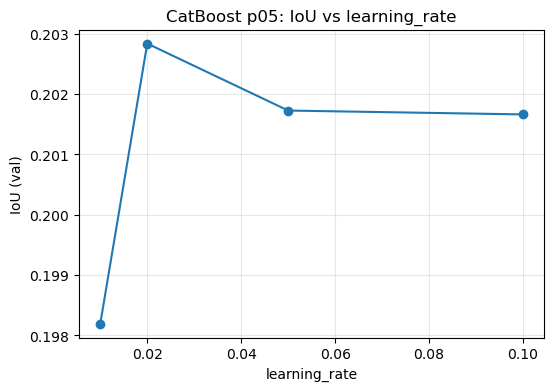

In [110]:
learning_rates = [0.1, 0.05, 0.02, 0.01]
ious = []

for lr in learning_rates:
    params = {
        "learning_rate": lr,
        "depth": 6,
        "l2_leaf_reg": 10,
        "subsample": 0.8,
    }

    _, iou = train_catboost_p05(
        params,
        X_train, y05_train,
        X_val, y05_val,
        y95_val,
        y95_val_pred,
        cat_features=CAT_FEATURES
    )

    ious.append(iou)
    print(f"learning_rate={lr}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(learning_rates, ious, marker="o")
plt.xlabel("learning_rate")
plt.ylabel("IoU (val)")
plt.title("CatBoost p05: IoU vs learning_rate")
plt.grid(alpha=0.3)
plt.show()

depth=8: IoU=0.20828
depth=9: IoU=0.20857
depth=10: IoU=0.20922
depth=11: IoU=0.21045
depth=12: IoU=0.21015


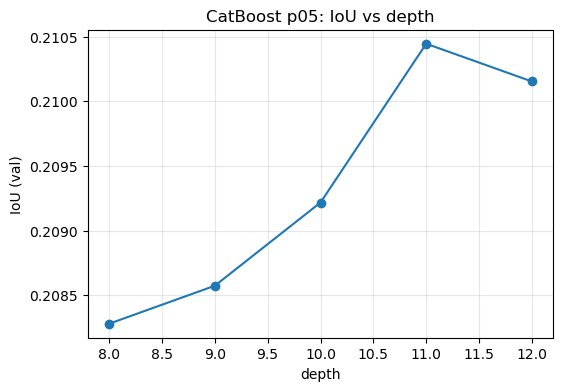

In [112]:
depths = [8, 9, 10, 11, 12]
ious = []

for d in depths:
    params = {
        "learning_rate": 0.02,
        "depth": d,
        "l2_leaf_reg": 10,
        "subsample": 0.8,
    }

    _, iou = train_catboost_p05(
        params,
        X_train, y05_train,
        X_val, y05_val,
        y95_val,
        y95_val_pred,
        cat_features=CAT_FEATURES
    )

    ious.append(iou)
    print(f"depth={d}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(depths, ious, marker="o")
plt.xlabel("depth")
plt.ylabel("IoU (val)")
plt.title("CatBoost p05: IoU vs depth")
plt.grid(alpha=0.3)
plt.show()

l2_leaf_reg=1: IoU=0.20612
l2_leaf_reg=3: IoU=0.20602
l2_leaf_reg=5: IoU=0.20776
l2_leaf_reg=10: IoU=0.21045
l2_leaf_reg=20: IoU=0.20824
l2_leaf_reg=30: IoU=0.20832
l2_leaf_reg=50: IoU=0.20904


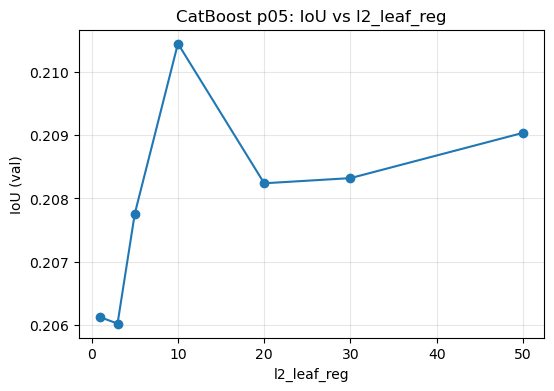

In [113]:
l2_regs = [1, 3, 5, 10, 20, 30, 50]
ious = []

for l2 in l2_regs:
    params = {
        "learning_rate": 0.02,
        "depth": 11,
        "l2_leaf_reg": l2,
        "subsample": 0.8,
    }

    _, iou = train_catboost_p05(
        params,
        X_train, y05_train,
        X_val, y05_val,
        y95_val,
        y95_val_pred,
        cat_features=CAT_FEATURES
    )

    ious.append(iou)
    print(f"l2_leaf_reg={l2}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(l2_regs, ious, marker="o")
plt.xlabel("l2_leaf_reg")
plt.ylabel("IoU (val)")
plt.title("CatBoost p05: IoU vs l2_leaf_reg")
plt.grid(alpha=0.3)
plt.show()


subsample=0.6: IoU=0.20964
subsample=0.7: IoU=0.21038
subsample=0.8: IoU=0.21045
subsample=0.9: IoU=0.20962
subsample=1.0: IoU=0.20908


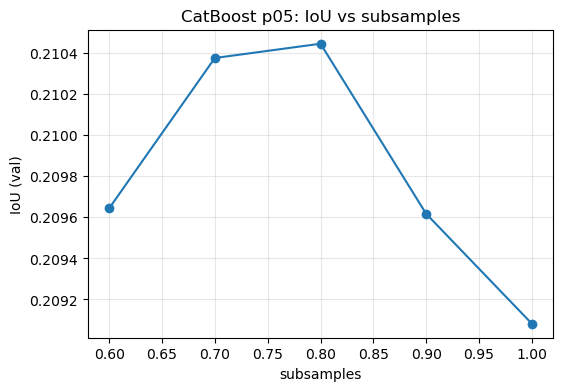

In [114]:
subsamples = [0.6, 0.7, 0.8, 0.9, 1.0]
ious = []

for ss in subsamples:
    params = {
        "learning_rate": 0.02,
        "depth": 11,
        "l2_leaf_reg": 10,
        "subsample": ss,
    }

    _, iou = train_catboost_p05(
        params,
        X_train, y05_train,
        X_val, y05_val,
        y95_val,
        y95_val_pred,
        cat_features=CAT_FEATURES
    )

    ious.append(iou)
    print(f"subsample={ss}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(subsamples, ious, marker="o")
plt.xlabel("subsamples")
plt.ylabel("IoU (val)")
plt.title("CatBoost p05: IoU vs subsamples")
plt.grid(alpha=0.3)
plt.show()


#### подбор параметров для р95

In [115]:
def train_catboost_p95(
    params,
    X_train, y95_train,
    X_val, y95_val,
    y05_val,
    y05_val_pred,
    cat_features,
    n_estimators=800
):
    model = CatBoostRegressor(
        loss_function="Quantile:alpha=0.95",
        iterations=n_estimators,
        random_seed=322,
        verbose=False,
        **params
    )

    model.fit(
        X_train, y95_train,
        eval_set=(X_val, y95_val),
        cat_features=cat_features
    )

    y95_val_pred = model.predict(X_val)

    lower = np.minimum(y05_val_pred, y95_val_pred)
    upper = np.maximum(y05_val_pred, y95_val_pred)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        lower,
        upper
    )

    return model, iou

learning_rate=0.1: IoU=0.23704
learning_rate=0.05: IoU=0.23722
learning_rate=0.02: IoU=0.23692
learning_rate=0.01: IoU=0.23701


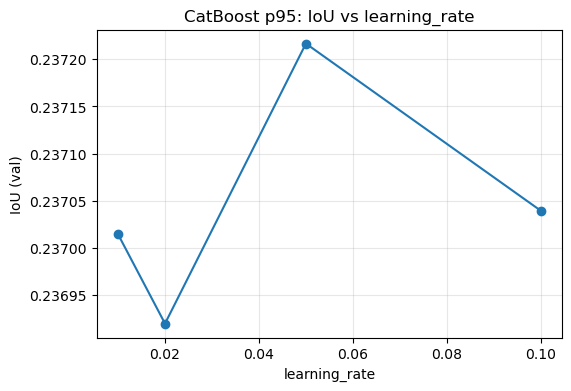

In [116]:
learning_rates = [0.1, 0.05, 0.02, 0.01]
ious = []

for lr in learning_rates:
    params = {
        "learning_rate": lr,
        "depth": 6,
        "l2_leaf_reg": 10,
        "subsample": 0.8,
    }

    _, iou = train_catboost_p95(
        params,
        X_train, y95_train,
        X_val, y95_val,
        y05_val,
        y05_val_pred,
        cat_features=CAT_FEATURES
    )

    ious.append(iou)
    print(f"learning_rate={lr}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(learning_rates, ious, marker="o")
plt.xlabel("learning_rate")
plt.ylabel("IoU (val)")
plt.title("CatBoost p95: IoU vs learning_rate")
plt.grid(alpha=0.3)
plt.show()

depth=1: IoU=0.23793
depth=2: IoU=0.23864
depth=3: IoU=0.23814
depth=4: IoU=0.23783
depth=5: IoU=0.23790
depth=6: IoU=0.23722


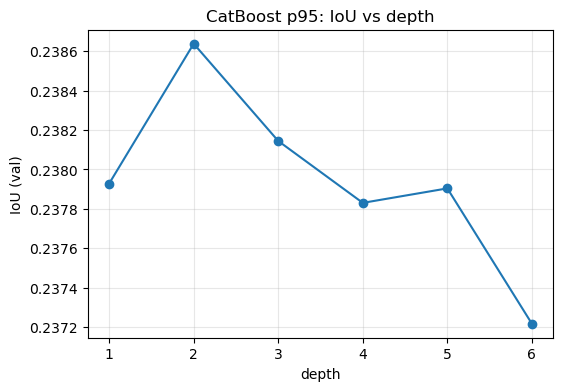

In [119]:
depths = [1, 2, 3, 4, 5, 6]
ious = []

for d in depths:
    params = {
        "learning_rate": 0.05,
        "depth": d,
        "l2_leaf_reg": 10,
        "subsample": 0.8,
    }

    _, iou = train_catboost_p95(
        params,
        X_train, y95_train,
        X_val, y95_val,
        y05_val,
        y05_val_pred,
        cat_features=CAT_FEATURES
    )

    ious.append(iou)
    print(f"depth={d}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(depths, ious, marker="o")
plt.xlabel("depth")
plt.ylabel("IoU (val)")
plt.title("CatBoost p95: IoU vs depth")
plt.grid(alpha=0.3)
plt.show()

l2_leaf_reg=10: IoU=0.23864
l2_leaf_reg=30: IoU=0.23843
l2_leaf_reg=50: IoU=0.23867
l2_leaf_reg=70: IoU=0.23867
l2_leaf_reg=90: IoU=0.23856


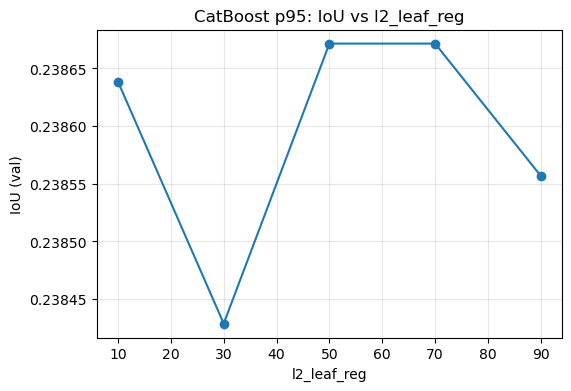

In [121]:
l2_regs = [10, 30, 50, 70, 90]
ious = []

for l2 in l2_regs:
    params = {
        "learning_rate": 0.05,
        "depth": 2,
        "l2_leaf_reg": l2,
        "subsample": 0.8,
    }

    _, iou = train_catboost_p95(
        params,
        X_train, y95_train,
        X_val, y95_val,
        y05_val,
        y05_val_pred,
        cat_features=CAT_FEATURES
    )

    ious.append(iou)
    print(f"l2_leaf_reg={l2}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(l2_regs, ious, marker="o")
plt.xlabel("l2_leaf_reg")
plt.ylabel("IoU (val)")
plt.title("CatBoost p95: IoU vs l2_leaf_reg")
plt.grid(alpha=0.3)
plt.show()

subsample=0.2: IoU=0.18438
subsample=0.6: IoU=0.18490
subsample=0.7: IoU=0.18602
subsample=0.8: IoU=0.18591
subsample=0.9: IoU=0.18324
subsample=1.0: IoU=0.18455


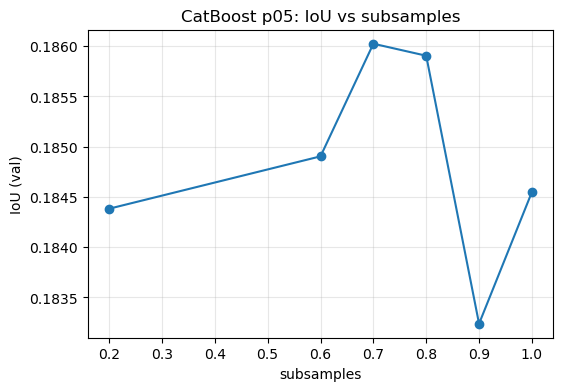

In [123]:
subsamples = [0.2, 0.6, 0.7, 0.8, 0.9, 1.0]
ious = []

for ss in subsamples:
    params = {
        "learning_rate": 0.05,
        "depth": 2,
        "l2_leaf_reg": 50,
        "subsample": ss,
    }

    _, iou = train_catboost_p05(
        params,
        X_train, y05_train,
        X_val, y05_val,
        y95_val,
        y95_val_pred,
        cat_features=CAT_FEATURES
    )

    ious.append(iou)
    print(f"subsample={ss}: IoU={iou:.5f}")

plt.figure(figsize=(6,4))
plt.plot(subsamples, ious, marker="o")
plt.xlabel("subsamples")
plt.ylabel("IoU (val)")
plt.title("CatBoost p05: IoU vs subsamples")
plt.grid(alpha=0.3)
plt.show()

#### Итоговые параметры

In [47]:
cat_base_params = {
    "loss_function": "Quantile",  
    "learning_rate": 0.02,
    "depth": 8,
    "l2_leaf_reg": 10,
    "subsample": 0.8,
    "rsm": 0.8,
    "random_seed": SEED,
    "verbose": False,
    "allow_writing_files": False
}


# Модель для 5 квантиля цены
params_p05 = cat_base_params.copy()
params_p05["loss_function"] = "Quantile:alpha=0.05"

model_cat_p05 = CatBoostRegressor(**params_p05, iterations = 500)

model_cat_p05.fit(
    X_train,
    y05_train,
    #eval_set=(X_val, y05_val),
    cat_features=CAT_FEATURES
)


# Модель для 95 квантиля цены
params_p95 = cat_base_params.copy()
params_p95.update({
    "loss_function": "Quantile:alpha=0.95",
    "learning_rate": 0.05,
    "depth": 6,
    "l2_leaf_reg": 50,
    "subsample": 0.7
})

model_cat_p95 = CatBoostRegressor(**params_p95, iterations = 500)

model_cat_p95.fit(
    X_train,
    y95_train,
    #eval_set=(X_val, y95_val),
    cat_features=CAT_FEATURES
)


#### Метрика на валидации

In [48]:
y05_val_pred = model_cat_p05.predict(X_val)
y95_val_pred = model_cat_p95.predict(X_val)

val_iou = mean_iou_1d(
    y05_true=y05_val.values,
    y95_true=y95_val.values,
    y05_pred=y05_val_pred,
    y95_pred=y95_val_pred
)

print(f"Validation IoU: {val_iou:.5f}")

lower = np.minimum(y05_val_pred, y95_val_pred)
upper = np.maximum(y05_val_pred, y95_val_pred)

y05_val_pred = lower
y95_val_pred = upper

Validation IoU: 0.20699


#### Метрика после калибровки

In [38]:
def calibrate_width(y05, y95, alpha):
    center = (y05 + y95) / 2
    width = (y95 - y05) * alpha
    return center - width / 2, center + width / 2

alphas = np.linspace(0.001, 5, 9)

best_alpha = None
best_iou_cat = -1

for a in alphas:
    p05_adj, p95_adj = calibrate_width(y05_val_pred, y95_val_pred, a)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        p05_adj,
        p95_adj
    )

    if iou > best_iou_cat:
        best_iou_cat = iou
        best_alpha = a

print(f"Best alpha: {best_alpha}, IoU: {best_iou_cat:.5f}")

Best alpha: 0.625875, IoU: 0.25520


### Ensemble

In [20]:
p05_lgb_val = model_lgb_p05.predict(X_val)
p95_lgb_val = model_lgb_p95.predict(X_val)

p05_xgb_val = model_xgb_p05.predict(X_val_enc)
p95_xgb_val = model_xgb_p95.predict(X_val_enc)

p05_cat_val = model_cat_p05.predict(X_val)
p95_cat_val = model_cat_p95.predict(X_val)

p05_ens_val = (
    p05_lgb_val +
    p05_xgb_val +
    p05_cat_val
) / 3

p95_ens_val = (
    p95_lgb_val +
    p95_xgb_val +
    p95_cat_val
) / 3

lower = np.minimum(p05_ens_val, p95_ens_val)
upper = np.maximum(p05_ens_val, p95_ens_val)


In [21]:
def calibrate_width(y05, y95, alpha):
    center = (y05 + y95) / 2
    width = (y95 - y05)
    width = np.maximum(width, 1e-6)
    width = width * alpha
    return center - width / 2, center + width / 2
alphas = np.linspace(0.5, 2.0, 21)

best_alpha = None
best_iou = -1

for a in alphas:
    p05_adj, p95_adj = calibrate_width(lower, upper, a)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        p05_adj,
        p95_adj
    )

    if iou > best_iou:
        best_iou = iou
        best_alpha = a

print(f"Best alpha (ensemble): {best_alpha}, IoU: {best_iou:.5f}")


Best alpha (ensemble): 0.725, IoU: 0.28232


In [31]:
np.linspace(0.5, 2.0, 21)

array([0.5  , 0.575, 0.65 , 0.725, 0.8  , 0.875, 0.95 , 1.025, 1.1  ,
       1.175, 1.25 , 1.325, 1.4  , 1.475, 1.55 , 1.625, 1.7  , 1.775,
       1.85 , 1.925, 2.   ])

In [79]:
from itertools import product

p05_lgb_val = model_lgb_p05.predict(X_val)
p95_lgb_val = model_lgb_p95.predict(X_val)

p05_xgb_val = model_xgb_p05.predict(X_val_enc)
p95_xgb_val = model_xgb_p95.predict(X_val_enc)

p05_cat_val = model_cat_p05.predict(X_val)
p95_cat_val = model_cat_p95.predict(X_val)

weights = np.arange(0.1, 1.0, 0.1)

best_iou = -1
best_weights = None

for w_lgb, w_xgb in product(weights, repeat=2):
    w_cat = 1.0 - w_lgb - w_xgb
    
    if w_cat < 0:
        continue

    # Ensemble
    p05_ens = (
        w_lgb * p05_lgb_val +
        w_xgb * p05_xgb_val +
        w_cat * p05_cat_val
    )

    p95_ens = (
        w_lgb * p95_lgb_val +
        w_xgb * p95_xgb_val +
        w_cat * p95_cat_val
    )

    # защита от инверсии
    lower = np.minimum(p05_ens, p95_ens)
    upper = np.maximum(p05_ens, p95_ens)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        lower,
        upper
    )

    if iou > best_iou:
        best_iou = iou
        best_weights = (w_lgb, w_xgb, w_cat)

print(f"Best IoU: {best_iou:.5f}")
print(f"Best weights (LGB, XGB, CAT): {best_weights}")


Best IoU: 0.27873
Best weights (LGB, XGB, CAT): (0.1, 0.7000000000000001, 0.19999999999999996)


In [74]:
# пример весов — можно подбирать
w_lgb = 1/3
w_xgb = 1/3
w_cat = 1/3

p05_ens_val = (
    w_lgb * p05_lgb_val +
    w_xgb * p05_xgb_val +
    w_cat * p05_cat_val
)

p95_ens_val = (
    w_lgb * p95_lgb_val +
    w_xgb * p95_xgb_val +
    w_cat * p95_cat_val
)
lower = np.minimum(p05_ens_val, p95_ens_val)
upper = np.maximum(p05_ens_val, p95_ens_val)

def calibrate_width(y05, y95, alpha):
    center = (y05 + y95) / 2
    width = (y95 - y05)
    width = np.maximum(width, 1e-6)
    width = width * alpha
    return center - width / 2, center + width / 2

alphas = np.linspace(0.5, 2.0, 21)

best_alpha = None
best_iou = -1

for a in alphas:
    p05_adj, p95_adj = calibrate_width(lower, upper, a)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        p05_adj,
        p95_adj
    )

    if iou > best_iou:
        best_iou = iou
        best_alpha = a

print(f"Best alpha (ensemble): {best_alpha}, IoU: {best_iou:.5f}")

Best alpha (ensemble): 0.725, IoU: 0.28232


### Новые признаки

In [53]:
for col in CAT_FEATURES:
    train[col] = train[col].astype("category")

# X = train[FEATURES]
# y_p05 = train["price_p05"]
# y_p95 = train["price_p95"]

In [54]:
split_date = train["dt"].quantile(0.8)

# train_idx = train["dt"] <= split_date
# val_idx = train["dt"] > split_date

# X_train, X_val = X[train_idx], X[val_idx]
# y05_train, y05_val = y_p05[train_idx], y_p05[val_idx]
# y95_train, y95_val = y_p95[train_idx], y_p95[val_idx]

# пример
train_df = train[train["dt"] <= split_date].copy()
val_df   = train[train["dt"] >  split_date].copy()

val_df_masked = val_df.copy()
val_df_masked["price_p05"] = np.nan
val_df_masked["price_p95"] = np.nan

full_df = pd.concat([train_df, val_df_masked], axis=0)
full_df = full_df.sort_values(["product_id", "dt"])


In [55]:
full_df = create_time_features(full_df)

/var/folders/21/mcz0tnl905vfvw_bly0t5sth0000gn/T/ipykernel_93172/2672793816.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df.groupby('product_id')


In [56]:
group = full_df.groupby("product_id")

for lag in [1, 2, 3, 7]:
    full_df[f"p05_lag_{lag}"] = group["price_p05"].shift(lag)
    full_df[f"p95_lag_{lag}"] = group["price_p95"].shift(lag)

full_df["rolling_mean_p95_7"] = group["price_p95"].transform(
    lambda x: x.shift(1).rolling(7).mean()
)


/var/folders/21/mcz0tnl905vfvw_bly0t5sth0000gn/T/ipykernel_93172/3492421141.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = full_df.groupby("product_id")


In [57]:
train_feat = full_df.loc[full_df["dt"] <= split_date].copy()
val_feat   = full_df.loc[full_df["dt"] >  split_date].copy()


In [62]:
NUM_FEATURES = [
    "dow", "day_of_month", "week_of_year", "month",
    "n_stores", "holiday_flag", "activity_flag",
    "precpt", "avg_temperature", "avg_humidity", "avg_wind_level",
    
    'p05_lag_1', 'p95_lag_1', 'p05_lag_2', 'p95_lag_2',
       'p05_lag_3', 'p95_lag_3', 'p05_lag_7', 'p95_lag_7',
       'rolling_mean_p95_7', 'rolling_std_p95_7', 'holiday_soon' 
]

CAT_FEATURES = [
    "product_id", "management_group_id", "first_category_id",
    "second_category_id", "third_category_id"
]

FEATURES = NUM_FEATURES + CAT_FEATURES

In [63]:
model_p05.fit(
    train_feat[FEATURES], y05_train,
    #eval_set=[(X_val, y05_val)],
    eval_metric="quantile",
    categorical_feature=CAT_FEATURES
   # early_stopping_rounds=50,
   # verbose=False
)

model_p95.fit(
    train_feat[FEATURES], y95_train,
    #eval_set=[(X_val, y05_val)],
    eval_metric="quantile",
    categorical_feature=CAT_FEATURES
   # early_stopping_rounds=50,
   # verbose=False
)

y05_val_pred = model_p05.predict(val_feat[FEATURES])
y95_val_pred = model_p95.predict(val_feat[FEATURES])

val_iou = mean_iou_1d(
    y05_true=y05_val.values,
    y95_true=y95_val.values,
    y05_pred=y05_val_pred,
    y95_pred=y95_val_pred
)

print(f"Validation IoU: {val_iou:.5f}")


Validation IoU: 0.20325


In [20]:
def create_time_features(df):
    df = df.sort_values(['product_id', 'dt'])
    
    # Группируем по товару для корректного сдвига
    group = df.groupby('product_id')

    # 1. Лаги (значения цен n дней назад)
    for lag in [1, 2, 3, 7]:
        df[f'p05_lag_{lag}'] = group['price_p05'].shift(lag)
        df[f'p95_lag_{lag}'] = group['price_p95'].shift(lag)

    # 2. Скользящие агрегаты (статистика за последнюю неделю)
    # Помогают модели понять текущий тренд цены
    df['rolling_mean_p95_7'] = group['price_p95'].transform(
        lambda x: x.shift(1).rolling(window=7).mean()
    )
    df['rolling_std_p95_7'] = group['price_p95'].transform(
        lambda x: x.shift(1).rolling(window=7).std()
    )
    
    # 3. Признак "праздничного шлейфа"
    # Цена может меняться не только в праздник, но и за 2 дня ДО него
    df['holiday_soon'] = df['holiday_flag'].shift(-1).fillna(0)
    
    return df

In [65]:
def calibrate_width(y05, y95, alpha):
    center = (y05 + y95) / 2
    width = (y95 - y05) * alpha
    return center - width / 2, center + width / 2

alphas = np.linspace(0.001, 5, 9)

best_alpha = None
best_iou_lgb = -1

for a in alphas:
    p05_adj, p95_adj = calibrate_width(y05_val_pred, y95_val_pred, a)

    iou = mean_iou_1d(
        y05_val.values,
        y95_val.values,
        p05_adj,
        p95_adj
    )

    if iou > best_iou_lgb:
        best_iou_lgb = iou
        best_alpha = a

print(f"Best alpha: {best_alpha}, IoU: {best_iou_lgb:.5f}")

Best alpha: 0.625875, IoU: 0.24008


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

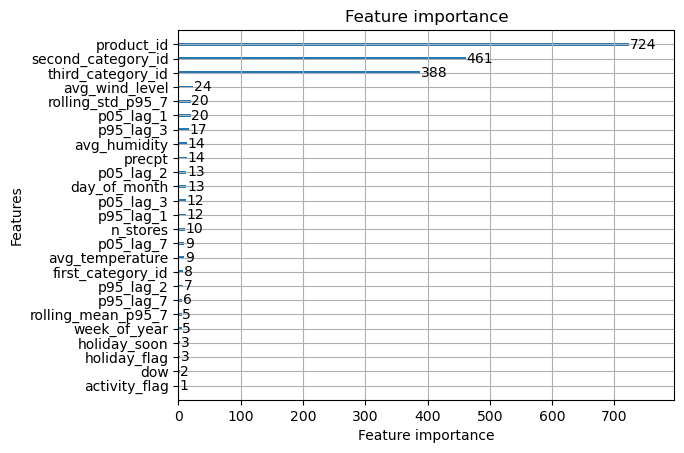

In [67]:
lgb.plot_importance(model_p95, max_num_features=30)


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

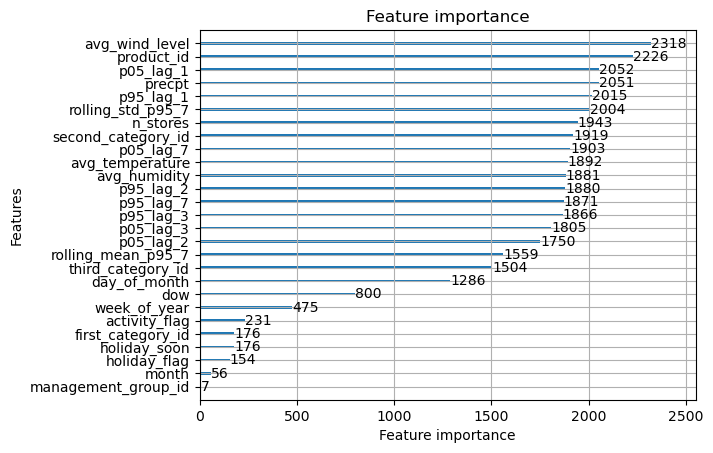

In [68]:
lgb.plot_importance(model_p05, max_num_features=30)

### Детекция аномалий (результат на кагл оказался хуже)

In [245]:
from sklearn.ensemble import IsolationForest

# Обучаем только на трейне!
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(train[['price_p05', 'price_p95', 'n_stores',
                                 "avg_temperature",
    "avg_humidity",
    "avg_wind_level",
    "holiday_flag",
    "activity_flag",]])

# Оставляем только "нормальные" данные
train_cleaned = train[outliers == 1]

In [246]:
NUM_FEATURES = [
    "dow", "day_of_month", "week_of_year", "month",
    "n_stores", "holiday_flag", "activity_flag",
    "precpt", "avg_temperature", "avg_humidity", "avg_wind_level"
    
    # 'p05_lag_1', 'p95_lag_1', 'p05_lag_2', 'p95_lag_2',
    #    'p05_lag_3', 'p95_lag_3', 'p05_lag_7', 'p95_lag_7',
    #    'rolling_mean_p95_7', 'rolling_std_p95_7', 'holiday_soon' 
]

CAT_FEATURES = [
    "product_id", "management_group_id", "first_category_id",
    "second_category_id", "third_category_id"
]

FEATURES = NUM_FEATURES + CAT_FEATURES

for col in CAT_FEATURES:
    train_cleaned[col] = train_cleaned[col].astype("category")

X = train_cleaned[FEATURES]
y_p05 = train_cleaned["price_p05"]
y_p95 = train_cleaned["price_p95"]

split_date = train_cleaned["dt"].quantile(0.8)

train_idx = train_cleaned["dt"] <= split_date
val_idx = train_cleaned["dt"] > split_date

X_train, X_val = X[train_idx], X[val_idx]
y05_train, y05_val = y_p05[train_idx], y_p05[val_idx]
y95_train, y95_val = y_p95[train_idx], y_p95[val_idx]

/var/folders/21/mcz0tnl905vfvw_bly0t5sth0000gn/T/ipykernel_93172/1960070278.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[col] = train_cleaned[col].astype("category")
/var/folders/21/mcz0tnl905vfvw_bly0t5sth0000gn/T/ipykernel_93172/1960070278.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[col] = train_cleaned[col].astype("category")
/var/folders/21/mcz0tnl905vfvw_bly0t5sth0000gn/T/ipykernel_93172/1960070278.py:19: SettingWithCopyWarning: 
A value is trying to be set 

### Калибровка + калибровка

In [293]:
preds = {}

preds["lgb"] = (
    model_lgb_p05.predict(X_val),
    model_lgb_p95.predict(X_val)
)

preds["xgb"] = (
    model_xgb_p05.predict(X_val_enc),
    model_xgb_p95.predict(X_val_enc)
)

preds["cat"] = (
    model_cat_p05.predict(X_val),
    model_cat_p95.predict(X_val)
)


In [297]:
def fix_order(p05, p95):
    return np.minimum(p05, p95), np.maximum(p05, p95)

for k in preds:
    preds[k] = fix_order(*preds[k])


In [295]:
def calibrate_width(p05, p95, alpha):
    center = (p05 + p95) / 2
    width = (p95 - p05) * alpha
    return center - width/2, center + width/2

def find_best_alpha(p05, p95, y05, y95):
    best_iou, best_alpha = -1, 1.0
    for a in np.linspace(0.7, 1.5, 17):
        lo, hi = calibrate_width(p05, p95, a)
        iou = mean_iou_1d(y05, y95, lo, hi)
        if iou > best_iou:
            best_iou, best_alpha = iou, a
    return best_alpha

alphas = {}
for k in preds:
    alphas[k] = find_best_alpha(*preds[k], y05_val.values, y95_val.values)

for k in preds:
    preds[k] = calibrate_width(*preds[k], alphas[k])


In [298]:
weights = np.linspace(0.1, 0.9, 9)

best_iou, best_w = -1, None

for w_lgb in weights:
    for w_xgb in weights:
        w_cat = 1 - w_lgb - w_xgb
        if w_cat <= 0:
            continue

        p05_ens = (
            w_lgb * preds["lgb"][0]
          + w_xgb * preds["xgb"][0]
          + w_cat * preds["cat"][0]
        )

        p95_ens = (
            w_lgb * preds["lgb"][1]
          + w_xgb * preds["xgb"][1]
          + w_cat * preds["cat"][1]
        )

        p05_ens, p95_ens = fix_order(p05_ens, p95_ens)

        iou = mean_iou_1d(y05_val.values, y95_val.values, p05_ens, p95_ens)

        if iou > best_iou:
            best_iou, best_w = iou, (w_lgb, w_xgb, w_cat)

print("Best ensemble:", best_w, "IoU:", best_iou)


Best ensemble: (0.30000000000000004, 0.4, 0.29999999999999993) IoU: 0.279606563186848


In [299]:
best_alpha_ens = find_best_alpha(
    p05_ens, p95_ens,
    y05_val.values, y95_val.values
)

p05_ens, p95_ens = calibrate_width(
    p05_ens, p95_ens, best_alpha_ens
)


In [300]:
final_iou = mean_iou_1d(
    y05_val.values,
    y95_val.values,
    p05_ens,
    p95_ens
)

print("FINAL IoU:", final_iou)


FINAL IoU: 0.27396525560703866


### кластеризация

In [311]:
# Создаем профиль каждого товара
product_stats = train_cleaned.groupby('product_id').agg({
    'price_p95': ['mean', 'std'],
    'activity_flag': 'mean',
    'n_stores': 'mean'
}).fillna(0)

# Плоские названия колонок
product_stats.columns = ['price_mean', 'price_std', 'promo_freq', 'stores_mean']

# Считаем коэффициент вариации вручную (std / mean)
# Добавляем небольшое число в знаменатель, чтобы не делить на ноль
product_stats['price_cv'] = product_stats['price_std'] / (product_stats['price_mean'] + 1e-6)

# Масштабируем данные (теперь колонок 5)
scaler = StandardScaler()
product_stats_scaled = scaler.fit_transform(product_stats)

/var/folders/21/mcz0tnl905vfvw_bly0t5sth0000gn/T/ipykernel_93172/3815778869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_stats = train_cleaned.groupby('product_id').agg({


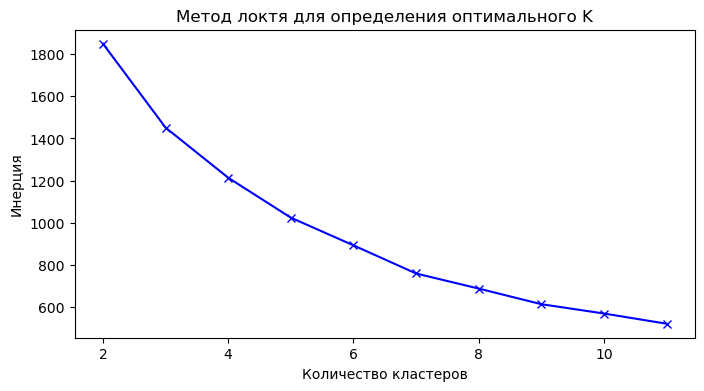

In [312]:
import matplotlib.pyplot as plt

inertia = []
K = range(2, 12)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(product_stats_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального K')
plt.show()

In [313]:
# Допустим, выбрали 6 кластеров
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=322, n_init=10)
product_stats['product_cluster'] = kmeans.fit_predict(product_stats_scaled)

# Добавляем этот признак в основные датасеты
train = train.merge(product_stats[['product_cluster']], on='product_id', how='left')
#test = test.merge(product_stats[['product_cluster']], on='product_id', how='left')

# ВАЖНО: для новых товаров в тесте (которых нет в трейне) заполним кластером -1 или самым частым
#test['product_cluster'] = test['product_cluster'].fillna(-1).astype(int)

# Добавляем в список категориальных признаков
if 'product_cluster' not in CAT_FEATURES:
    CAT_FEATURES.append('product_cluster')

train['product_cluster'] = train['product_cluster'].astype('category')

### PCA

In [379]:
agg_df = train.groupby("product_id").agg({
    "price_p05": ["mean", "std", "min", "max"],
    "price_p95": ["mean", "std", "min", "max"],
    "n_stores": ["mean", "std"],
    "activity_flag": "mean",
    "holiday_flag": "mean"
})

agg_df.columns = ["_".join(c) for c in agg_df.columns]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_emb = StandardScaler().fit_transform(agg_df)

pca = PCA(n_components=8, random_state=322)
X_pca = pca.fit_transform(X_emb)

agg_df_pca = pd.DataFrame(
    X_pca,
    index=agg_df.index,
    columns=[f"pca_{i}" for i in range(8)]
)


In [380]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=8,
    random_state=322,
    n_init=20
)

agg_df["cluster"] = kmeans.fit_predict(X_pca)


In [381]:
train = train.merge(
    agg_df["cluster"],
    on="product_id",
    how="left"
)



train["cluster"] = train["cluster"].astype("category")



In [357]:
train

,dt,price_p05,price_p95,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id,cluster
0,2024-03-28,1.136102,1.167625,-0.588881,-0.298690,-1.936029,0.621756,-0.439349,0,0,6,8,2,76,3,28,13,3,0,5
1,2024-03-28,1.134437,1.187344,-0.619600,0.405719,0.445211,0.570925,-0.093355,0,0,0,27,26,176,3,28,13,3,97,0
2,2024-03-28,1.108822,1.109324,0.014373,-0.019595,-1.501780,0.556075,2.026399,0,1,6,8,33,196,3,28,13,3,525,6
3,2024-03-28,0.926422,1.119094,-0.601682,0.054312,-1.421444,0.597876,1.448901,0,1,5,2,4,33,3,28,13,3,98,1
4,2024-03-28,1.128347,1.177850,0.192393,-0.467843,-1.990949,0.305294,0.014748,0,1,6,24,41,12,3,28,13,3,524,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,2024-05-26,1.171831,1.172285,-0.334024,-0.748305,0.033259,-0.334682,0.869871,1,0,2,18,18,10,6,26,21,5,192,1
29096,2024-05-26,0.636705,1.085411,-0.638136,1.954561,0.960147,0.812550,-0.383005,1,1,6,17,39,135,6,26,21,5,624,6
29097,2024-05-26,0.983191,1.135426,-0.605582,-0.634516,0.297428,-0.125238,0.201257,1,0,1,22,38,124,6,26,21,5,167,4
29098,2024-05-26,1.076472,1.158295,-0.553405,1.755385,0.770098,0.772485,-0.294818,1,0,6,8,24,190,6,26,21,5,354,0


### kaagle

In [25]:
test = pd.read_csv('test.csv')
print('test from kaagle:')
display(test.head(3))

sample_submission = pd.read_csv('sample_submission.csv')
print('sample_submission:')
display(sample_submission.head(3))

test from kaagle:


,dt,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id,row_id
0,2024-05-27,-0.336440,0.966715,0.619788,0.455497,0.011164,0,0,0,9,72,68,0,27,22,5,113,0
1,2024-05-28,-0.341302,0.970148,0.685420,0.231812,0.044739,0,1,0,9,51,68,1,28,22,5,113,1
2,2024-05-29,-0.467158,0.539593,0.671440,0.240995,-0.060100,0,1,0,9,40,67,2,29,22,5,113,2


sample_submission:


,row_id,price_p05,price_p95
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,0.0


In [26]:
test["dt"] = pd.to_datetime(test["dt"])
test = test.drop(columns=["row_id"])

for col in CAT_FEATURES:
    test[col] = test[col].astype("category")

In [27]:
test_enc = test.copy()    
test_enc[CAT_FEATURES] = encoder.transform(test[CAT_FEATURES])

In [24]:
w_lgb = 1/3
w_xgb =1/3
w_cat=1/3

In [23]:
best_alpha

0.725

In [28]:
# test predictions
p05_lgb_test = model_lgb_p05.predict(test[FEATURES])
p95_lgb_test = model_lgb_p95.predict(test[FEATURES])

p05_xgb_test = model_xgb_p05.predict(test_enc[FEATURES])
p95_xgb_test = model_xgb_p95.predict(test_enc[FEATURES])

p05_cat_test = model_cat_p05.predict(test[FEATURES])
p95_cat_test = model_cat_p95.predict(test[FEATURES])

# ensemble
p05_ens_test = (
    w_lgb * p05_lgb_test +
    w_xgb * p05_xgb_test +
    w_cat * p05_cat_test
)

p95_ens_test = (
    w_lgb * p95_lgb_test +
    w_xgb * p95_xgb_test +
    w_cat * p95_cat_test
)

# защита + калибровка
lower = np.minimum(p05_ens_test, p95_ens_test)
upper = np.maximum(p05_ens_test, p95_ens_test)

p05_final, p95_final = calibrate_width(lower, upper, best_alpha)


In [29]:
sample_submission["price_p05"] = p05_final
sample_submission["price_p95"] = p95_final

#sample_submission.to_csv("submission_ens.csv", index=False)

In [71]:
sample_submission.to_csv("submission_0.725,IoU:0.28232.csv", index=False)

In [30]:
sample_submission

,row_id,price_p05,price_p95
0,0,1.003930,1.178570
1,1,0.949255,1.171363
2,2,0.953852,1.173473
3,3,0.965037,1.178763
4,4,0.970148,1.181459
...,...,...,...
28045,28045,0.921644,1.138362
28046,28046,0.906311,1.123434
28047,28047,0.936468,1.145076
28048,28048,0.916403,1.139833


In [78]:
s = pd.read_csv('submission_0.725,IoU:0.28232.csv')
s

,row_id,price_p05,price_p95
0,0,1.003930,1.178570
1,1,0.949255,1.171363
2,2,0.953852,1.173473
3,3,0.965037,1.178763
4,4,0.970148,1.181459
...,...,...,...
28045,28045,0.921644,1.138362
28046,28046,0.906311,1.123434
28047,28047,0.936468,1.145076
28048,28048,0.916403,1.139833


In [427]:
sample_submission.to_csv("submission_ens+fichi.csv", index=False)

In [269]:
best_alpha

0.95

In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29100 entries, 0 to 29099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt                   29100 non-null  datetime64[ns]
 1   price_p05            29100 non-null  float64       
 2   price_p95            29100 non-null  float64       
 3   n_stores             29100 non-null  float64       
 4   precpt               29100 non-null  float64       
 5   avg_temperature      29100 non-null  float64       
 6   avg_humidity         29100 non-null  float64       
 7   avg_wind_level       29100 non-null  float64       
 8   holiday_flag         29100 non-null  int64         
 9   activity_flag        29100 non-null  int64         
 10  management_group_id  29100 non-null  category      
 11  first_category_id    29100 non-null  category      
 12  second_category_id   29100 non-null  category      
 13  third_category_id    29100 non-null 

In [88]:
test["dt"] = pd.to_datetime(test["dt"])
test = test.drop(columns=["row_id"])
for col in CAT_FEATURES:
    test[col] = test[col].astype("category")

In [89]:
full_data = pd.concat([train, test], axis=0).sort_values(['product_id', 'dt'])

# 2. Создаем признаки на ВСЕМ объеме (важно!)
# ВАЖНО: FEATURES должны быть одинаковыми и для валидации, и для теста.
# Если в модели есть lag_1, он должен быть и в тесте.
for lag in [1, 2, 3, 7, 14]: 
    full_data[f"p05_lag_{lag}"] = full_data.groupby("product_id")["price_p05"].shift(lag)
    full_data[f"p95_lag_{lag}"] = full_data.groupby("product_id")["price_p95"].shift(lag)

# 3. Убеждаемся, что типы категорий сохранены
for col in CAT_FEATURES:
    full_data[col] = full_data[col].astype("category")

# 4. Выделяем тест
test = full_data[full_data['price_p05'].isna()].copy()

In [82]:
# 1. Объединяем (в тесте целевые колонки будут NaN)
full_df = pd.concat([train, test], axis=0).sort_values(['product_id', 'dt'])

# 2. Создаем лаги
# Эти значения "перетекут" из трейна в начало теста
for lag in [7, 14, 30]: # Используем более длинные лаги, если тест длинный
    full_df[f'p95_lag_{lag}'] = full_df.groupby('product_id')['price_p95'].shift(lag)
    full_df[f'p05_lag_{lag}'] = full_df.groupby('product_id')['price_p05'].shift(lag)

# 3. Экспоненциальное сглаживание или скользящее среднее (тоже со сдвигом)
# Сдвиг на 7 дней гарантирует, что признак будет доступен для всей первой недели теста
full_df['rolling_mean_7'] = full_df.groupby('product_id')['price_p95'].transform(
    lambda x: x.shift(7).rolling(window=7).mean()
)

# 4. Разделяем обратно
train_final = full_df[full_df['price_p05'].notna()]
test = full_df[full_df['price_p05'].isna()]

In [90]:
test = create_time_features(test)




/var/folders/21/mcz0tnl905vfvw_bly0t5sth0000gn/T/ipykernel_93172/2672793816.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df.groupby('product_id')


In [91]:
test["price_p05_pred"] = model_p05.predict(test[FEATURES])
test["price_p95_pred"] = model_p95.predict(test[FEATURES])

ALPHA = 0.625875  # <-- подставь свой лучший

center = (test["price_p05_pred"] + test["price_p95_pred"]) / 2
width = (test["price_p95_pred"] - test["price_p05_pred"]) * ALPHA

test["price_p05_pred"] = center - width / 2
test["price_p95_pred"] = center + width / 2

sample_submission["price_p05"] = test["price_p05_pred"].values
sample_submission["price_p95"] = test["price_p95_pred"].values

In [187]:
# X_test_enc = test.copy()    
# X_test_enc[CAT_FEATURES] = encoder.transform(test[CAT_FEATURES])

# X_test_enc["price_p05_pred"] = model_p05.predict(X_test_enc[FEATURES])
# X_test_enc["price_p95_pred"] = model_p95.predict(X_test_enc[FEATURES])

# ALPHA = 1.2507499  # <-- подставь свой лучший

# center = (X_test_enc["price_p05_pred"] + X_test_enc["price_p95_pred"]) / 2
# width = (X_test_enc["price_p95_pred"] - X_test_enc["price_p05_pred"]) * ALPHA

# X_test_enc["price_p05_pred"] = center - width / 2
# X_test_enc["price_p95_pred"] = center + width / 2

# sample_submission["price_p05"] = X_test_enc["price_p05_pred"].values
# sample_submission["price_p95"] = X_test_enc["price_p95_pred"].values

# sample_submission.to_csv("submission_xgb.csv", index=False)

In [83]:
# предсказания
test["price_p05_pred"] = model_p05.predict(test[FEATURES])
test["price_p95_pred"] = model_p95.predict(test[FEATURES])

# защита от инверсии
lower = np.minimum(
    test["price_p05_pred"],
    test["price_p95_pred"]
)
upper = np.maximum(
    test["price_p05_pred"],
    test["price_p95_pred"]
)

test["price_p05_pred"] = lower
test["price_p95_pred"] = upper

In [84]:
ALPHA = 0.625875  # <-- подставь свой лучший

center = (test["price_p05_pred"] + test["price_p95_pred"]) / 2
width = (test["price_p95_pred"] - test["price_p05_pred"]) * ALPHA

test["price_p05_pred"] = center - width / 2
test["price_p95_pred"] = center + width / 2

In [85]:
sample_submission["price_p05"] = test["price_p05_pred"].values
sample_submission["price_p95"] = test["price_p95_pred"].values

In [93]:
sample_submission.to_csv("submission_newfih.csv", index=False)

In [92]:
sample_submission

,row_id,price_p05,price_p95
0,0,0.842963,1.130184
1,1,0.967657,1.158693
2,2,0.959526,1.159520
3,3,0.950784,1.156758
4,4,0.874915,1.137298
...,...,...,...
28045,28045,0.903297,1.144233
28046,28046,0.902569,1.144065
28047,28047,0.920655,1.149009
28048,28048,0.846277,1.131145
